Import necessary libraries

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the datasets and preview the data

In [185]:
regions = pd.read_csv("data/regions.csv")
regions

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5
5,Житомирська,Житомир,Zhytomyr,Житомирщина,6
6,Закарпатська,Ужгород,Uzhgorod,Закарпаття,7
7,Запорізька,Запоріжжя,Zaporozhye,Запоріжжя,8
8,Івано-Франківська,Івано-Франківськ,Ivano-Frankivsk,Івано-Франківщина,9
9,Київська,Київ,Kyiv,Київщина,10


In [186]:
alarms = pd.read_csv("data/alarms-240222-010325.csv", delimiter=";")
alarms.head()

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19


From the preview, we can see that 'region_id' values in the alarms dataset do not directly match with those in the regions dataset.

We will need to standardize or map them before merging.

In [187]:
weather = pd.read_csv("data/all_weather_by_hour_2023-2025_v1.csv")
weather.head()

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1020.0,0.0,91.5,0.0,NaN,0.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.2,88.2,0.0,NaN,0.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.0,10.0,100.0,NaN,NaN,NaN,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.1,92.0,0.0,NaN,0.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.0,93.8,0.0,NaN,0.0,Overcast,cloudy,obs,remote


# Analyze Data

## 1. Alarms Dataset

From the output of `alarms.info()`, we can see that there are **55,788 rows**, and all columns have the same number of **non-null** values, so there is no need to drop any rows due to missing data.

However, we also notice that the `start` and `end` columns are of type `object`, which means they are currently stored as strings. To work with time durations, we need to convert them to `datetime` format.

In [188]:
alarms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55788 entries, 0 to 55787
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           55788 non-null  int64 
 1   region_id    55788 non-null  int64 
 2   region_city  55788 non-null  object
 3   all_region   55788 non-null  int64 
 4   start        55788 non-null  object
 5   end          55788 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


Next, we convert the `start` and `end` columns to datetime format so that we can perform time-based operations.

We also create a new column called `duration_minutes`, which calculates the duration of each alarm in minutes. This format is more suitable for **visualizations** (even though using seconds could provide more precision for modeling).

In [189]:
alarms["start"] = pd.to_datetime(alarms["start"])
alarms["end"] = pd.to_datetime(alarms["end"])

alarms["duration_minutes"] = (alarms["end"] - alarms["start"]).dt.total_seconds() / 60

alarms.head()

,id,region_id,region_city,all_region,start,end,duration_minutes
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28,129.183333
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43,191.000000
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42,30.000000
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47,48.000000
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19,420.716667


In [190]:
alarms["region_city"].value_counts()

region_city
Донецька обл.             5886
Харківська обл.           5652
Запорізька обл.           5494
Дніпропетровська обл.     4966
Полтавська обл.           3499
Сумська обл.              3251
Миколаївська обл.         3123
Херсонська обл.           3031
Кіровоградська обл.       2913
Черкаська обл.            2119
Чернігівська обл.         2074
Одеська обл.              1937
Київська обл.             1654
Київ                      1552
Вінницька обл.            1373
Житомирська обл.          1334
Хмельницька обл.           968
Рівненська обл.            833
Тернопільська обл.         771
Волинська обл.             757
Івано-Франківська обл.     676
Львівська обл.             672
Чернівецька обл.           665
Закарпатська обл.          581
Крим                         7
Name: count, dtype: int64

In [191]:
alarms["region_id"].value_counts()

region_id
5     5886
19    5652
8     5494
4     4966
15    3499
17    3251
9     3206
13    3123
20    3031
10    2913
22    2119
23    2074
14    1937
3     1373
6     1334
21     968
16     833
18     771
2      757
24     676
12     672
1      665
7      581
25       7
Name: count, dtype: int64

We can see that **Kyiv** and **Kyivska oblast** (Kyiv region) share the same `region_id`, but they are listed as **separate entries** in the `region_city` column.

This is important to keep in mind during modeling.

### Describe Numerical Features

In [192]:
alarms.describe()

,id,region_id,all_region,start,end,duration_minutes
count,55788.000000,55788.000000,55788.000000,55788,55788,55788.000000
mean,109103.029935,12.178121,0.972180,2023-09-25 09:23:29.614648320,2023-09-25 10:36:17.500806400,72.798103
min,1.000000,1.000000,0.000000,2022-02-24 07:43:17,2022-02-24 09:52:28,-781.700000
25%,68259.750000,6.000000,1.000000,2022-12-11 12:10:05.750000128,2022-12-11 12:40:25.249999872,26.566667
50%,126918.500000,13.000000,1.000000,2023-10-31 19:11:42,2023-10-31 20:33:28,39.733333
75%,143399.250000,19.000000,1.000000,2024-06-24 11:41:12.249999872,2024-06-24 12:35:58.500000,84.716667
max,158665.000000,25.000000,1.000000,2025-03-01 23:26:07,2025-03-02 02:44:07,3031.300000
std,38574.559928,6.474089,0.164457,NaN,NaN,93.094316


From the statistics, we can see that a very large number of rows have `all_region` equal to 1.

We also notice a problem in the `duration_minutes` column — the minimum value is **-781**, which is not possible for duration. This suggests that there may be incorrect or misordered timestamps in the `start` and `end` columns. We need to investigate these cases further and correct or improve them.

Now let's look at the rows where `all_region` is equal to 0.


In [193]:
alarms[alarms["all_region"] == 0].head()

,id,region_id,region_city,all_region,start,end,duration_minutes
9,72852,9,Київ,0,2022-02-25 07:19:04,2022-02-25 07:49:04,30.0
39,72853,9,Київ,0,2022-02-26 11:24:04,2022-02-26 11:54:04,30.0
59,72854,9,Київ,0,2022-02-26 19:56:04,2022-02-26 20:26:04,30.0
62,72855,9,Київ,0,2022-02-26 20:58:04,2022-02-26 21:28:04,30.0
65,72856,9,Київ,0,2022-02-26 22:57:04,2022-02-26 23:27:04,30.0


As we can see, most of the region-specific alarms (`all_region == 0`) were triggered in **Kyiv**.

Let's now check if there are any other regions.


In [194]:
alarms[(alarms["all_region"] == 0) & (alarms["region_city"] != "Київ")]

,id,region_id,region_city,all_region,start,end,duration_minutes


In [195]:
alarms[(alarms["all_region"] == 1) & (alarms["region_city"] == "Київ")]

,id,region_id,region_city,all_region,start,end,duration_minutes


We checked two scenarios:
- When `all_region == 0` and the city is **not** Kyiv.
- When `all_region == 1` and the city **is** Kyiv.


And this means the `all_region` column does not provide additional value for modeling or analysis and can be safely dropped.

However, to maintain the distinction between **Kyiv** and **Kyivska oblast**, we will assign a new `region_id` for the oblast. Since the current maximum value in `region_id` is 25, we will assign **26** to Kyivska oblast.


In [196]:
alarms.loc[alarms["region_city"] == "Київська обл.", "region_id"] = 26
alarms.drop("all_region", axis=1, inplace=True)


Next, let's identify where the problem in `duration_minutes` occurred.

We will now look at the rows where `duration_minutes` is less than 0 to find and fix these issues.

In [197]:
alarms[alarms["duration_minutes"] < 0]

,id,region_id,region_city,start,end,duration_minutes
47970,150000,17,Сумська обл.,2024-10-01 20:53:04,2024-10-01 07:51:22,-781.7


We found that the issue with negative `duration_minutes` occurs in just **one case**.

Based on official information from [alarmmap.online](https://alarmmap.online/region/sumska-oblast/), we determined that the `end` time for this specific alarm was recorded incorrectly.

To fix it, we will update the `end` timestamp to the correct value: **2024-10-02 07:51:22**.


In [198]:
alarms.loc[alarms["id"] == 150000, "end"] = pd.to_datetime("2024-10-02 07:51:22")

alarms.loc[alarms["id"] == 150000, "duration_minutes"] = (
        (alarms.loc[alarms["id"] == 150000, "end"] - alarms.loc[
            alarms["id"] == 150000, "start"]).dt.total_seconds() / 60
)

alarms[alarms["id"] == 150000]

,id,region_id,region_city,start,end,duration_minutes
47970,150000,17,Сумська обл.,2024-10-01 20:53:04,2024-10-02 07:51:22,658.3


In [199]:
alarms.describe()

,id,region_id,start,end,duration_minutes
count,55788.000000,55788.000000,55788,55788,55788.000000
mean,109103.029935,12.682136,2023-09-25 09:23:29.614648320,2023-09-25 10:36:19.049526528,72.823915
min,1.000000,1.000000,2022-02-24 07:43:17,2022-02-24 09:52:28,0.066667
25%,68259.750000,6.000000,2022-12-11 12:10:05.750000128,2022-12-11 12:40:25.249999872,26.566667
50%,126918.500000,13.000000,2023-10-31 19:11:42,2023-10-31 20:33:28,39.733333
75%,143399.250000,19.000000,2024-06-24 11:41:12.249999872,2024-06-24 12:35:58.500000,84.720833
max,158665.000000,26.000000,2025-03-01 23:26:07,2025-03-02 02:44:07,3031.300000
std,38574.559928,6.857442,NaN,NaN,93.057012


At this point, we have an optimized and cleaned version of the dataset. To further improve its quality for modeling, we can consider the following enhancements:

1. **Drop `region_city`**:
   Since we now have a reliable `region_id`, we can remove `region_city` to avoid redundancy.
   However, we must ensure that `region_id` values are treated as categorical, and that close numerical values do not imply geographical similarity during model training — unless we intentionally assign region IDs based on geographic logic, such as the **shortest distance to the aggressor's border** being represented with the **lowest index**.

2. **Add Additional Features**:
   Extract more time-based features such as `start_date`, `start_hour`, `day_of_week`, `month`, etc.


## Visual Exploration of the Data

Now let's visualize the alarms dataset to better understand it.


Before creating visualizations, we make a copy of the original dataset to ensure that any changes we apply do not affect the original `alarms` DataFrame.


In [200]:
alarms_copy = alarms.copy()

### Number of Alarms by Region

Now let's visualize how many alarms were triggered in each region.
This not only helps us identify which areas experienced more frequent alerts, but also serves as a basic check — if the numbers look too low or too high for certain regions, it might indicate issues with the data.


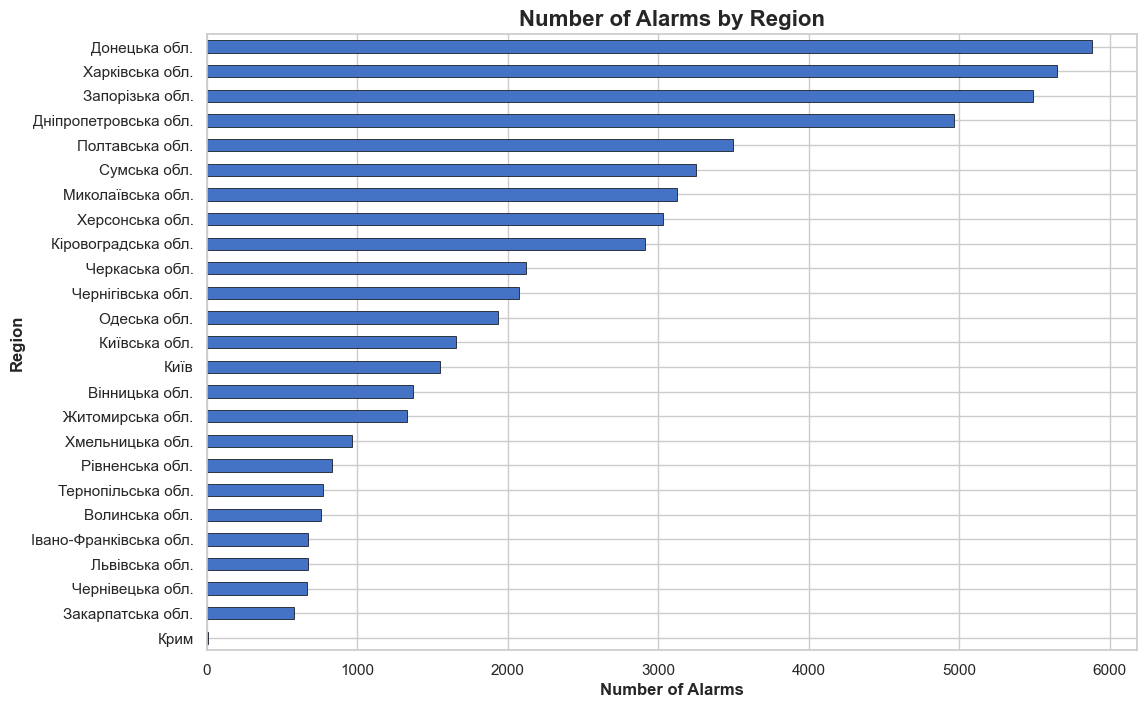

In [201]:
region_counts = alarms_copy["region_city"].value_counts().sort_values()
region_counts.plot(kind="barh", figsize=(12, 8), color="#4472C4", edgecolor="black", linewidth=0.5)
plt.xlabel("Number of Alarms", fontsize=12, fontweight="bold")
plt.ylabel("Region", fontsize=12, fontweight="bold")
plt.title("Number of Alarms by Region", fontsize=16, fontweight="bold");

From the graph, we can see that the distribution of alarms across regions appears quite realistic.
However, to validate the accuracy of our data, it's best to compare it with official sources.

One such source is [air-alarms.in.ua](https://air-alarms.in.ua/?from=2022-02-24&to=2025-03-01), where we can check the actual number of alerts per region during the selected time period.


### Total Alarm Duration by Region

In this plot, we visualize the **total duration** of air alarms (in minutes) aggregated by region.
This gives us additional insight beyond just the number of alarms.

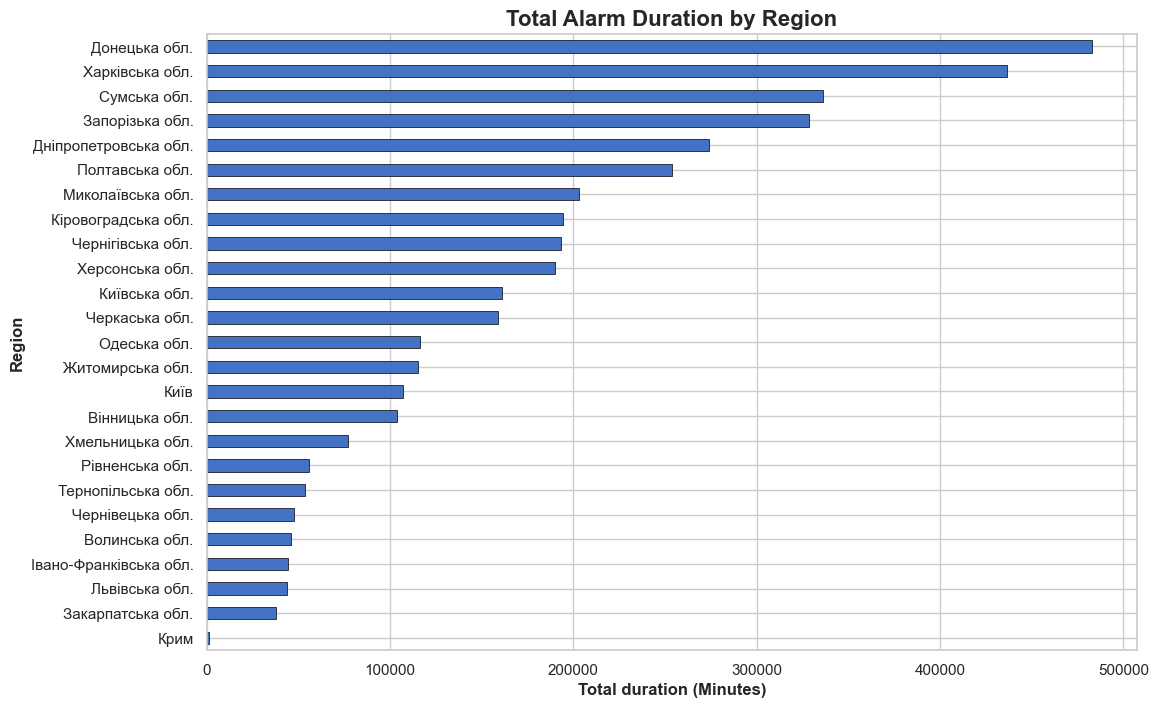

In [202]:
region_duration = alarms_copy.groupby("region_city")["duration_minutes"].sum().sort_values()
region_duration.plot(kind="barh", figsize=(12, 8), color="#4472C4", edgecolor="black", linewidth=0.5)
plt.xlabel("Total duration (Minutes)", fontsize=12, fontweight="bold")
plt.ylabel("Region", fontsize=12, fontweight="bold")
plt.title("Total Alarm Duration by Region", fontsize=16, fontweight="bold");

We can observe that the general pattern is similar to the previous chart based on the number of alarms.

### Average Alarm Duration by Region

This plot shows the average duration of individual air alarms in each region.
It helps us understand not just how often or how long alarms occurred in total, but the typical length of a single alert in each area.

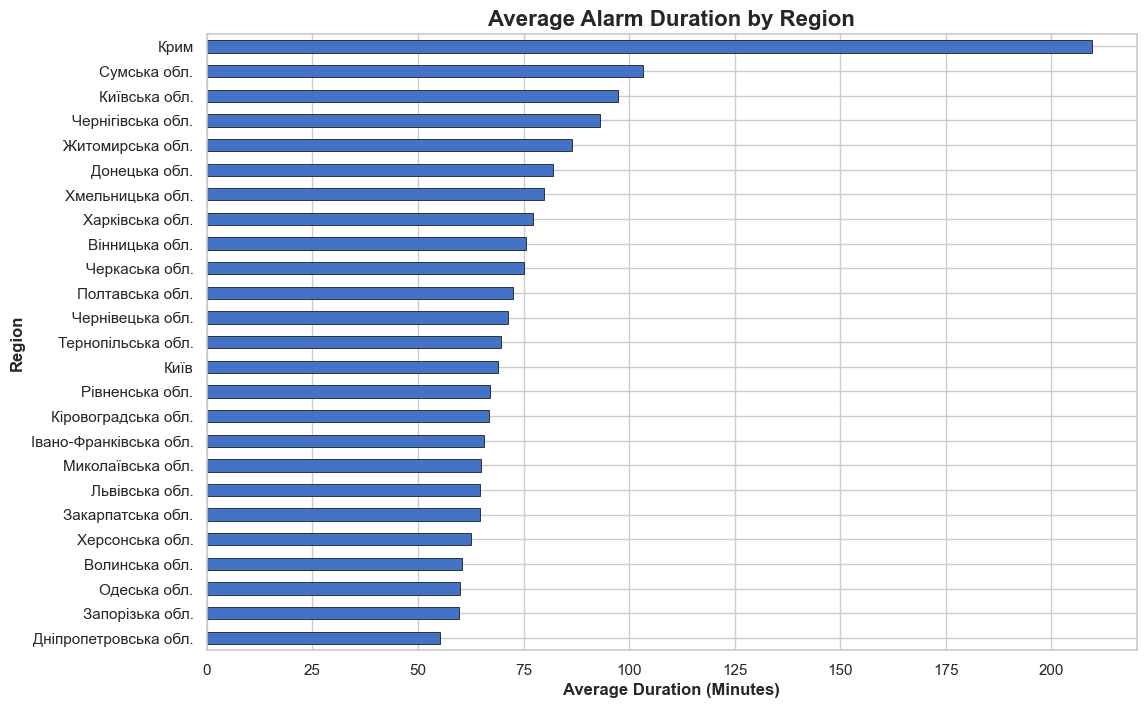

In [203]:
region_average = alarms_copy.groupby("region_city")["duration_minutes"].mean().sort_values()
region_average.plot(kind="barh", figsize=(12, 8), color="#4472C4", edgecolor="black", linewidth=0.5)
plt.xlabel("Average Duration (Minutes)", fontsize=12, fontweight='bold')
plt.ylabel("Region", fontsize=12, fontweight='bold')
plt.title("Average Alarm Duration by Region", fontsize=16, fontweight='bold');

We can already see a noticeable difference compared to the total number of alerts,
but we’ll highlight this more clearly in the next plot.


### Alarm Frequency vs Average Duration

This scatter plot displays each region as a dot positioned by:
- **Number of alarms** on the X-axis
- **Average alarm duration (minutes)** on the Y-axis

Each point is labeled with its corresponding region name.

This format helps us identify:
- Regions with **many frequent alarms but short durations**
- Regions with **fewer alarms but longer average durations**
- And those most severely affected in both frequency and duration

Note: Labels are still a bit dense in the central cluster. Some improvements could further enhance readability.

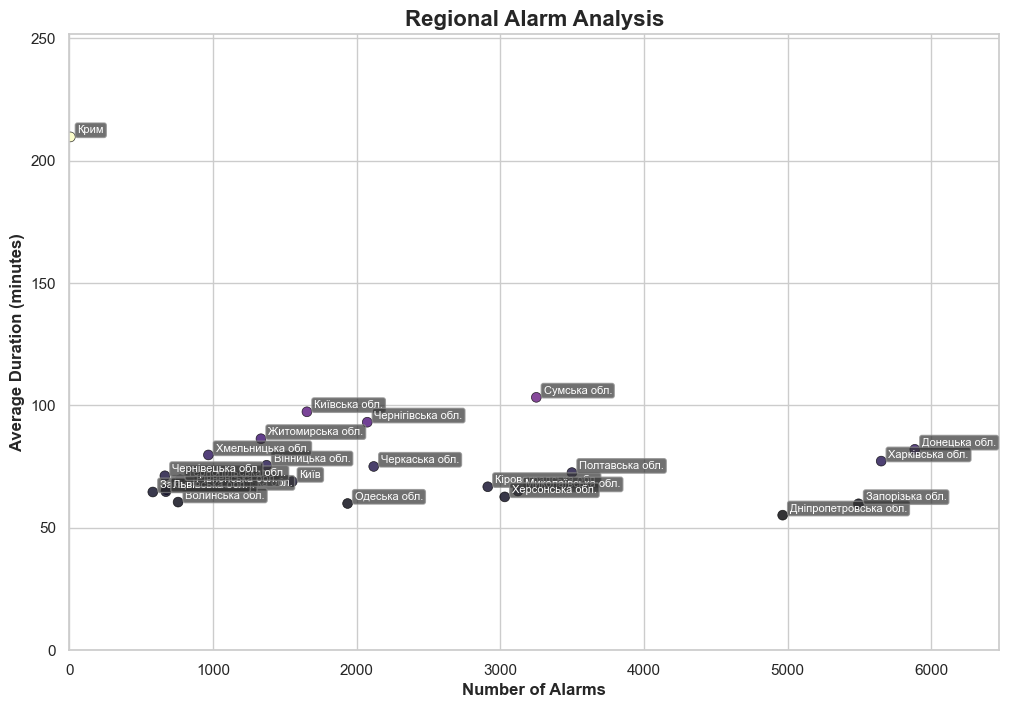

In [204]:
region_stats = alarms_copy.groupby("region_city").agg({
    "id": "count",
    "duration_minutes": "mean"
}).reset_index()
region_stats.columns = ["region_city", "count", "avg_duration"]

plt.figure(figsize=(12, 8))

plt.scatter(
    region_stats["count"],
    region_stats["avg_duration"],
    s=50,
    c=region_stats["avg_duration"],
    cmap="magma",
    alpha=0.8,
    edgecolors="black",
    linewidth=0.5
)

for _, row in region_stats.iterrows():
    plt.text(
        row["count"] + 50,
        row["avg_duration"] + 1.5,
        row["region_city"],
        fontsize=8,
        color="white",
        bbox=dict(boxstyle="round,pad=0.2", fc="#333333", ec="#888888", alpha=0.7)
    )

plt.xlabel("Number of Alarms", fontsize=12, fontweight="bold")
plt.ylabel("Average Duration (minutes)", fontsize=12, fontweight="bold")
plt.title("Regional Alarm Analysis", fontsize=16, fontweight="bold")

plt.xlim(0, region_stats["count"].max() * 1.1)
plt.ylim(0, region_stats["avg_duration"].max() * 1.2);

We can see that most regions are clustered in the lower-middle area, suggesting moderate alarm counts with average durations under 100 minutes.
However, a few regions stand out:
- **Crimea** has a significantly higher average duration despite a lower number of alarms.
- **Donetsk, Kharkiv, and Zaporizhzhia oblasts** show both high frequency and moderate-to-long average durations.
- **Sumy oblast** stands out with fewer alarms but a noticeably higher average duration.

### Distribution of Alarm Durations

This histogram shows the distribution of air alarm durations across all recorded events.

This visualization helps us understand how typical or extreme certain durations are, and whether the data is skewed.
It also gives a quick sense of whether short or long alarms were more common overall.


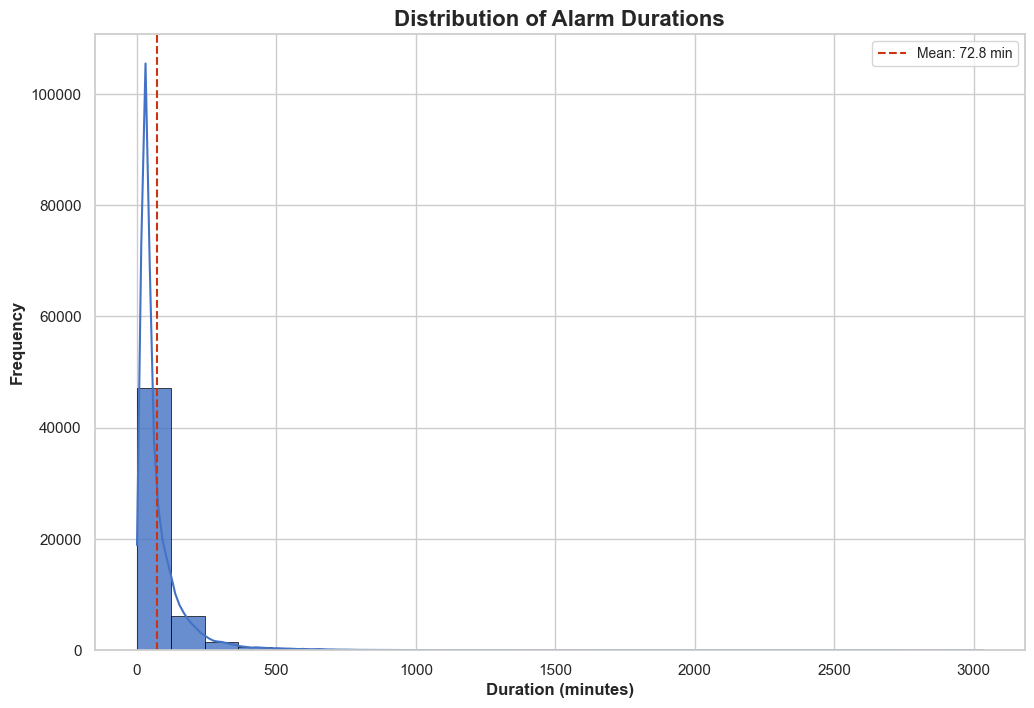

In [205]:
plt.figure(figsize=(12, 8))

ax = sns.histplot(
    alarms_copy["duration_minutes"],
    bins=25,
    kde=True,
    color="#4472C4",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

mean_duration = alarms_copy["duration_minutes"].mean()
plt.axvline(mean_duration, color='#CC3311', linestyle='--', linewidth=1.5,
            label=f'Mean: {mean_duration:.1f} min')
plt.title("Distribution of Alarm Durations", fontsize=16, fontweight='bold')
plt.xlabel("Duration (minutes)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.legend(fontsize=10);

As we can see from the histogram, the distribution of alarm durations is right-skewed.
Most alarms last under 50 minutes, but there are a few extreme outliers that significantly increase the mean.

This suggests that the mean alone may not fully represent the typical duration.


### Alarm Frequency by Start Hour

This bar chart illustrates how frequently air alarms were triggered at different hours of the day, based on the `start` time of each alarm.


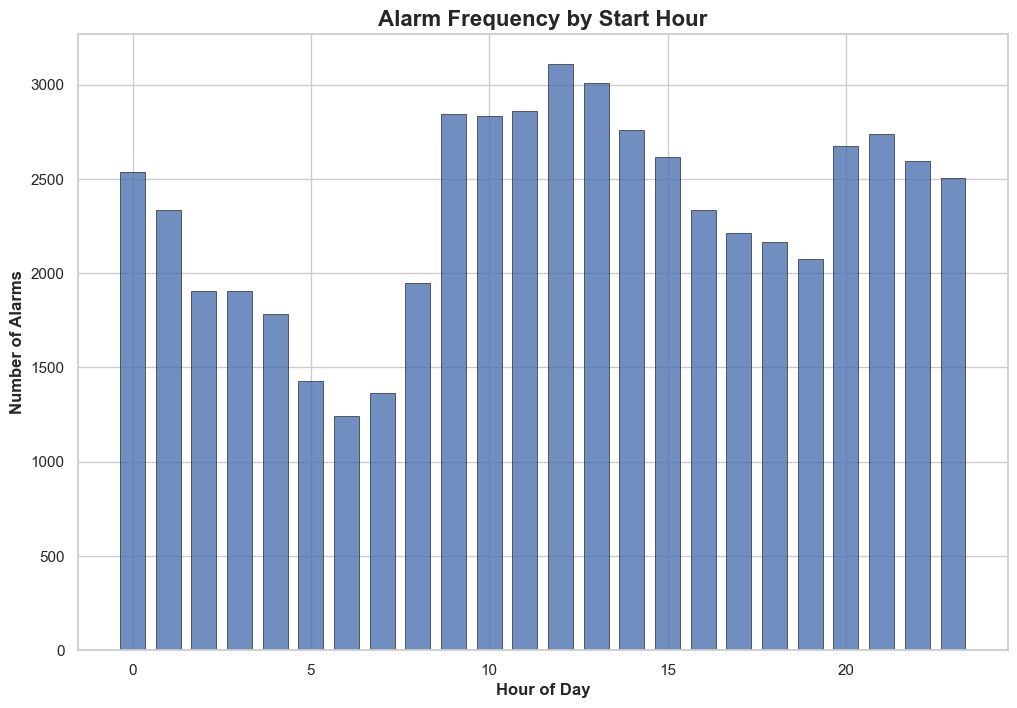

In [206]:
plt.figure(figsize=(12, 8))
alarms_copy["start_hour"] = alarms_copy["start"].dt.hour
hourly_counts = alarms_copy["start_hour"].value_counts().sort_index()
bars = plt.bar(
    hourly_counts.index,
    hourly_counts.values,
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)
plt.title("Alarm Frequency by Start Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Alarms", fontsize=12, fontweight='bold')
plt.xticks(rotation=0);

We can observe:
- A noticeable drop in alarms during early morning hours (especially around 4–6 AM).
- Alarm frequency increases significantly starting from **8 to 9 AM** and remains relatively high throughout the **daytime and evening**.
- The peak hours for alarm activations are between **11 AM and 2 PM**, indicating periods of highest alert activity.

### Alarm Frequency by End Hour

Same plot but with end hour

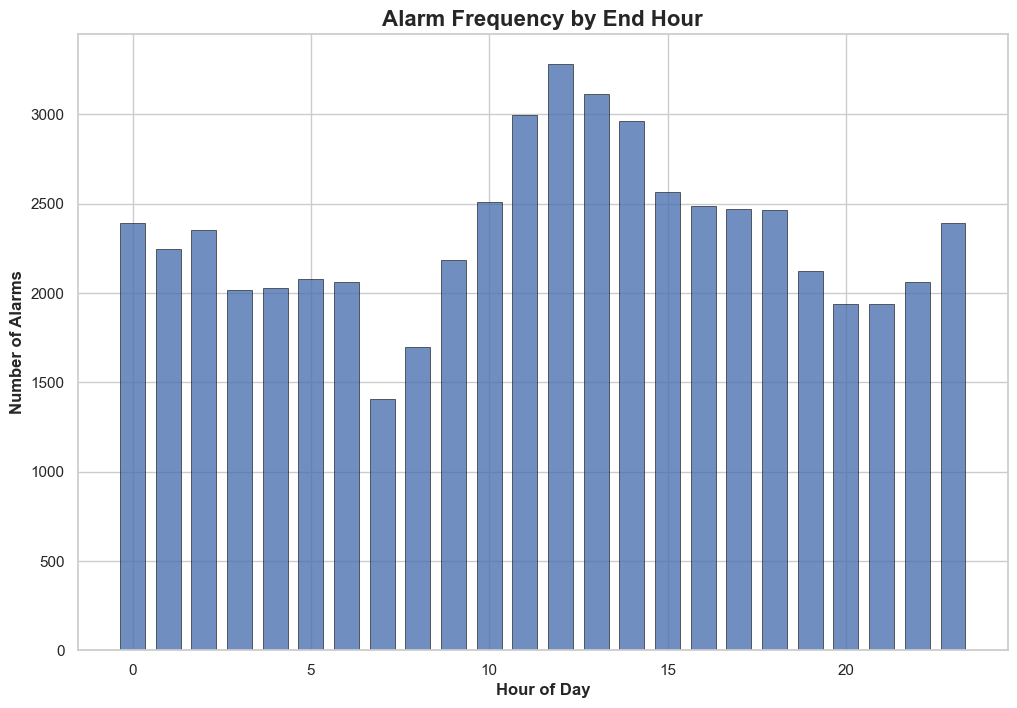

In [207]:
plt.figure(figsize=(12, 8))
alarms_copy["end_hour"] = alarms_copy["end"].dt.hour
hourly_counts = alarms_copy["end_hour"].value_counts().sort_index()
bars = plt.bar(
    hourly_counts.index,
    hourly_counts.values,
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)
plt.title("Alarm Frequency by End Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Alarms", fontsize=12, fontweight='bold')
plt.xticks(rotation=0);

Same results.

### Alarm Frequency by Day of Week and Hour

This heatmap visualizes how air alarm activity varies across both the **day of the week** and the **hour of the day**.

Each cell represents the number of alarms triggered during a specific hour on a specific day.
Darker shades indicate higher frequencies, while lighter shades represent quieter periods.

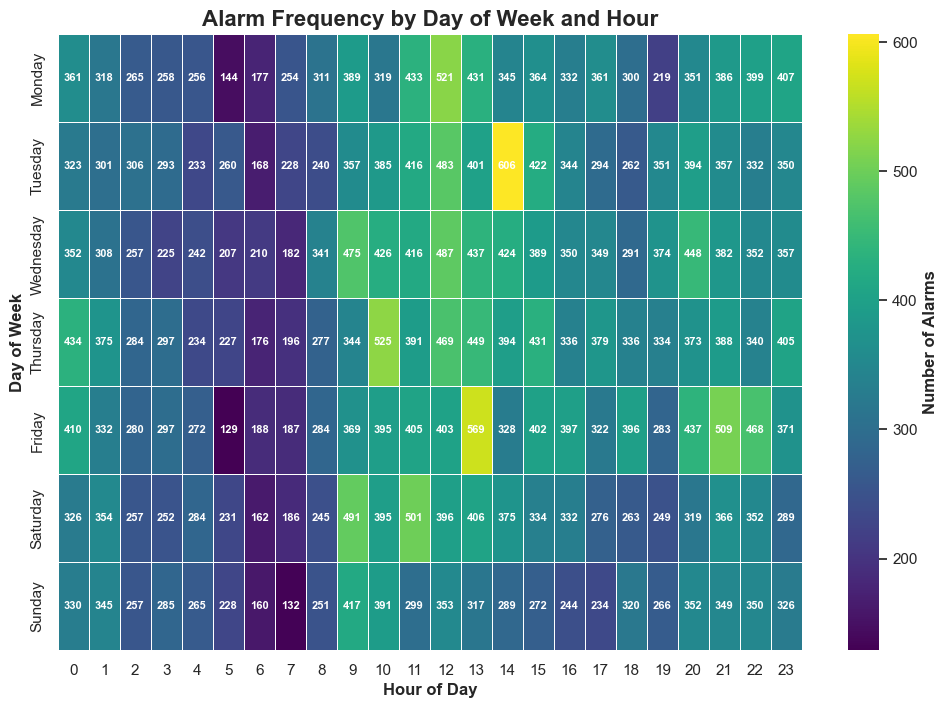

In [208]:
plt.figure(figsize=(12, 8))
alarms_copy["weekday"] = alarms_copy["start"].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = alarms_copy.groupby(["weekday", "start_hour"]).size().unstack().reindex(days_order)
ax = sns.heatmap(
    heatmap_data,
    cmap='viridis',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt="d",
    annot_kws={"size": 8, "color": "white", "weight": "bold"},
    cbar_kws={"label": "Number of Alarms"}
)
cbar = ax.collections[0].colorbar
cbar.set_label("Number of Alarms", size=12, weight="bold")
plt.title("Alarm Frequency by Day of Week and Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Day of Week", fontsize=12, fontweight='bold');

From the heatmap, we observe:
- Alarm activity is relatively **consistent across all days**, with no dramatic dips on weekends.
- Across the week, the **peak alarm hours fall between 10 AM and 2 PM**, confirming what we saw in the previous hourly histogram.
- **Thursday and Friday** appear to have slightly higher activity during peak hours.
- **Early morning hours (1 AM – 6 AM)** remain the least active overall.

### Alarm Frequency by Day of the Week

This bar chart shows the **total number of alarms triggered on each day of the week**.

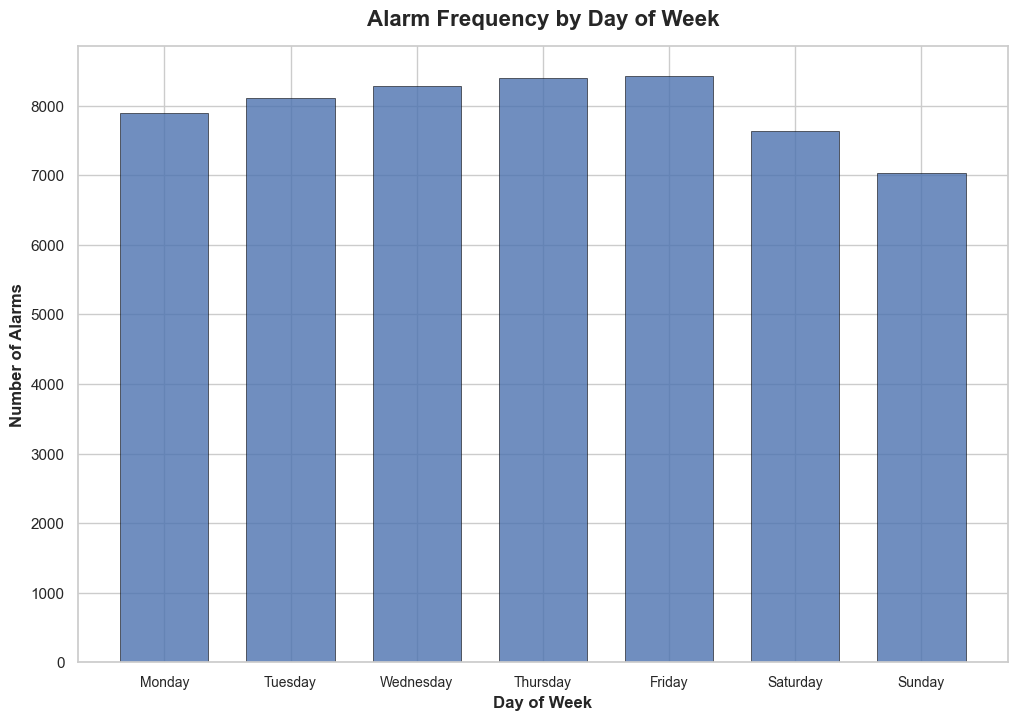

In [209]:
plt.figure(figsize=(12, 8))
day_counts = alarms_copy["weekday"].value_counts().reindex(days_order)
bars = plt.bar(
    day_counts.index,
    day_counts.values,
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)
plt.title("Alarm Frequency by Day of Week", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Day of Week", fontsize=12, fontweight='bold')
plt.ylabel("Number of Alarms", fontsize=12, fontweight='bold')
plt.xticks(range(len(days_order)), days_order, fontsize=10);


We observe a relatively consistent level of activity from **Monday through Friday**, with **Wednesday and Thursday** peaking slightly.
As we move into the weekend, there’s a noticeable decline, especially on **Sunday**, which recorded the **lowest number of alarms**.
This reinforces the pattern seen in the heatmap.

### Alarm Duration Distribution by Day of Week

This violin plot shows the distribution of **alarm durations (in minutes)** for each day of the week.

Each "violin" represents the spread and density of alarm durations — wider sections indicate where durations are more concentrated, while the vertical lines show the range.


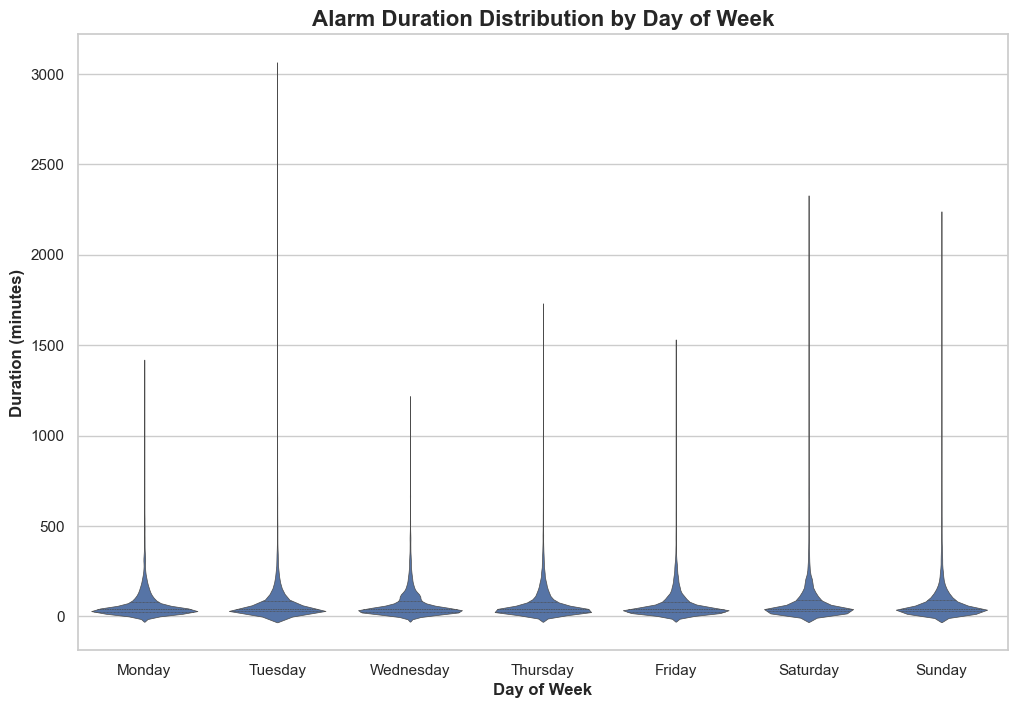

In [210]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='weekday',
    y='duration_minutes',
    data=alarms_copy,
    order=days_order,
    inner='quartile',
    linewidth=0.5,
    saturation=0.8
)
plt.title('Alarm Duration Distribution by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Duration (minutes)', fontsize=12, fontweight='bold');

From this plot we observe:
- Most durations are concentrated at the lower end (under 100 minutes), with a long tail of rare but **very long alarms**.
- The distribution shapes are relatively consistent across all days, though **Monday, Wednesday and Friday** show slightly more spread toward longer durations.

This view complements earlier weekday frequency plots by showing that even if some days have fewer alarms, their **duration profiles may still vary**.

### Monthly Alarm Count (2022–2025)

This heatmap displays the **monthly total of air alarms** for each year from 2022 to early 2025.

Each cell represents the number of alarms triggered in a specific month, with darker shades indicating higher intensity.

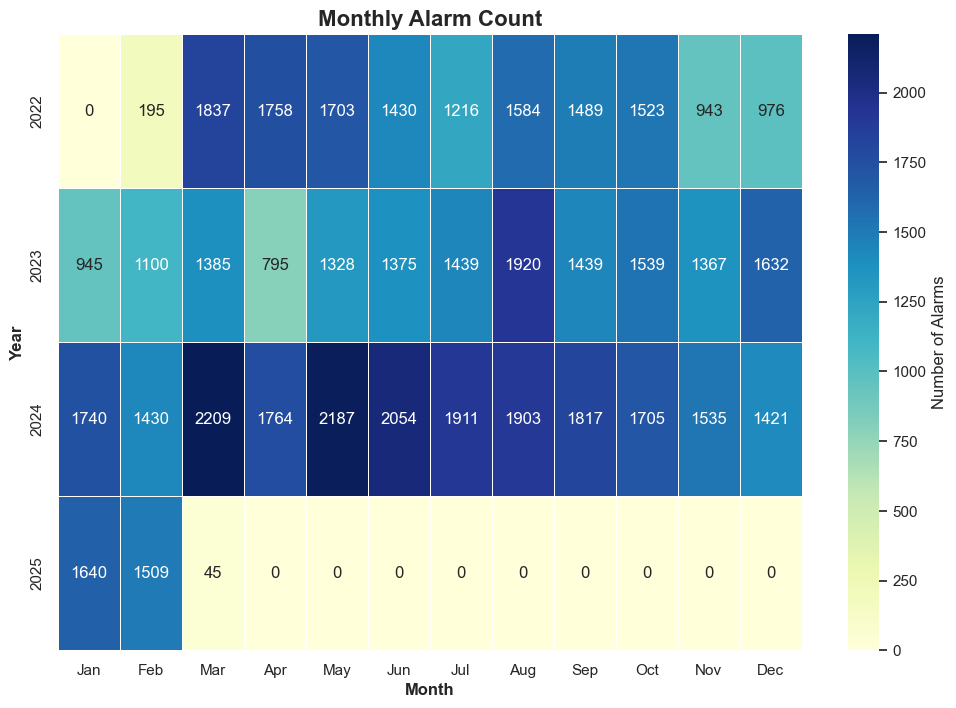

In [211]:
import numpy as np
import calendar

alarms_copy['year'] = alarms_copy['start'].dt.year
alarms_copy['month'] = alarms_copy['start'].dt.month
monthly_data = alarms_copy.groupby(['year', 'month']).agg({
    'id': 'count',
    'duration_minutes': 'mean'
}).reset_index()

pivot_count = monthly_data.pivot_table(index='year', columns='month', values='id', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_count,
    cmap='YlGnBu',
    annot=True,
    fmt="g",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Number of Alarms'},
)
plt.title('Monthly Alarm Count', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Year', fontsize=12, fontweight='bold')
plt.xticks(np.arange(12) + 0.5, [calendar.month_abbr[i] for i in range(1, 13)]);

From the visualization, we observe the following:

- **Alarm counts increased significantly in early 2023 and peaked in 2024**, particularly in **March, May, and June**.
- Alarm levels remained **consistently high across many months in 2024**, with no significant seasonal dip.

This heatmap provides an effective **temporal summary** of escalation and variation in threat frequency over time.

### Conclusion: Part 1 – Alarms Dataset Analysis

In this part, we conducted a detailed exploration of alarm data across multiple dimensions — duration, frequency, temporal patterns, and geographic distribution.

Key takeaways:
- Most alarms last under 100 minutes, though a few rare outliers skew the mean.
- Alarms are most frequently triggered between **10 AM and 2 PM**.
- Weekday patterns are fairly stable, with only a slight decrease in alarms on weekends.
- Alarm **duration distributions** are similar across the week, though some longer alerts appear midweek.

## 2. Weather Dataset

### Weather Dataset Overview

The output of `weather.info()` reveals that this dataset contains a **significant number of missing values** across multiple columns.

Because of this, each column should be **individually evaluated** to determine the appropriate handling strategy:
- **Impute missing values**
- **Keep as-is**
- Or **drop the column entirely**

In addition, both the `day_datetime` and `hour_datetime` columns are currently stored as `object` types.
For proper time-based analysis, we will:
- Convert them to `datetime` format,
- And combine them into a single unified `datetime` column to simplify processing and ensure consistency.

There are also time-related columns such as `day_sunrise` and `day_sunset`, which will also be converted to proper `datetime` format.

Some columns in the dataset contain epoch timestamps, which are no longer needed since we have already created proper `datetime` objects.  Therefore, we can safely drop these columns to simplify the dataset.


In [212]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608304 entries, 0 to 608303
Data columns (total 65 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city_latitude         608304 non-null  float64
 1   city_longitude        608304 non-null  float64
 2   city_resolvedAddress  608304 non-null  object 
 3   city_address          608304 non-null  object 
 4   city_timezone         608304 non-null  object 
 5   city_tzoffset         608304 non-null  float64
 6   day_datetime          608304 non-null  object 
 7   day_datetimeEpoch     608304 non-null  int64  
 8   day_tempmax           608304 non-null  float64
 9   day_tempmin           608304 non-null  float64
 10  day_temp              608304 non-null  float64
 11  day_feelslikemax      608304 non-null  float64
 12  day_feelslikemin      608304 non-null  float64
 13  day_feelslike         608304 non-null  float64
 14  day_dew               608304 non-null  float64
 15  

In [213]:
weather['datetime'] = pd.to_datetime(
    weather['day_datetime'].astype(str) + ' ' + weather['hour_datetime'].astype(str),
    format='%Y-%m-%d %H:%M:%S'
)

weather['sunrise_datetime'] = pd.to_datetime(
    weather['day_datetime'].astype(str) + ' ' + weather['day_sunrise'].astype(str),
    format='%Y-%m-%d %H:%M:%S'
)

weather['sunset_datetime'] = pd.to_datetime(
    weather['day_datetime'].astype(str) + ' ' + weather['day_sunset'].astype(str),
    format='%Y-%m-%d %H:%M:%S'
)
weather.drop(['day_datetime', 'hour_datetime', "day_sunset", "day_sunrise", "day_datetimeEpoch", "day_sunriseEpoch",
              "day_sunsetEpoch", "hour_datetimeEpoch"], axis=1, inplace=True)

### Understanding the Method for Handling Missing Values

Before applying any filling or deletion strategy, it's important to **fully understand the context and structure** of missing data in the dataset.

Our approach consists of the following steps:

1. **Explore each feature**:
   Determine the percentage and pattern of missing values in each column.
   Some columns may have isolated gaps (suitable for filling), while others may be mostly empty (better to drop).

2. **Evaluate relevance**:
   Assess whether the column is important for further analysis or modeling.
   Columns with low importance or no correlation may be dropped regardless of missingness.

3. **Check the duration and nature of gaps**:
   For time-series data, long gaps might require different handling than short, isolated ones.
   Short gaps are safely fillable with **`ffill`/`bfill`**.

4. **Apply missing value treatment after reviewing all features**:
   This ensures that the method is applied **consistently across the dataset**, avoiding unnecessary fragmentation or bias.

Only after this full review, we will proceed with filling or removing missing values based on the nature of each column.


In [214]:
def find_longest_missing_gap(df, target_column: str):
    """
    Finds and prints the longest continuous time gap where the values are missing (NaN)
    in a specified column of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The dataset containing the time and target columns.
    - target_column (str): The name of the column to check for missing values.

    Returns:
    - None. Prints the start, end, and duration of the longest missing interval.
    """

    df = df.copy()
    df = df.sort_values("datetime")
    missing = df[target_column].isna()
    group_id = missing.ne(missing.shift()).cumsum()

    missing_groups = df[missing].groupby(group_id)

    gap_info = missing_groups["datetime"].agg(['first', 'last'])
    gap_info['duration'] = gap_info['last'] - gap_info['first']

    if not gap_info.empty:
        longest = gap_info.loc[gap_info['duration'].idxmax()]
        print("Longest period with missing values in column:", target_column)
        print(f"– From: {longest['first']}")
        print(f"– To  : {longest['last']}")
    else:
        print(f"No missing values found in column '{target_column}'.")

In [215]:
find_longest_missing_gap(weather, "day_visibility")

Longest period with missing values in column: day_visibility
– From: 2024-03-31 02:00:00
– To  : 2024-03-31 04:00:00


We can see that the longest gap in this column is just **2 hours**,
which makes it reasonable to apply either **forward fill (`ffill`)** or **backward fill (`bfill`)** as an effective way to handle the missing values without introducing significant distortion.

In [216]:
find_longest_missing_gap(weather, "day_solarradiation")

Longest period with missing values in column: day_solarradiation
– From: 2024-10-28 00:00:00
– To  : 2024-10-28 23:00:00


In [217]:
find_longest_missing_gap(weather, "day_solarenergy")

Longest period with missing values in column: day_solarenergy
– From: 2024-10-28 00:00:00
– To  : 2024-10-28 23:00:00


In [218]:
find_longest_missing_gap(weather, "day_uvindex")

Longest period with missing values in column: day_uvindex
– From: 2024-10-28 00:00:00
– To  : 2024-10-28 23:00:00


These three columns share the same missing value pattern, including identical gap locations and durations.
The longest missing stretch is around **1 day**, which is not a small gap — but also not too long to make reconstruction unreliable.

Simple methods like `ffill` or `bfill` could work, even though they only use one direction.

In [219]:
find_longest_missing_gap(weather, "day_preciptype")

Longest period with missing values in column: day_preciptype
– From: 2024-04-29 23:00:00
– To  : 2024-05-05 00:00:00


In [220]:
weather["day_preciptype"].value_counts()

day_preciptype
rain                      244492
rain;snow                  77389
snow                       18790
rain;freezingrain;snow      1104
freezingrain;snow            168
rain;freezingrain             72
ice                           24
freezingrain;snow;ice         24
rain;snow;ice                 24
Name: count, dtype: int64

The `day_preciptype` column contains meaningful categorical information about types of precipitation, including multiple combined values (e.g., "rain;snow").

Although ~44% of the values are missing, it's reasonable to assume they indicate **no precipitation**.

Therefore, instead of dropping or ignoring the column, we will keep it and **fill missing values with `"none"`** to preserve clarity and make the data ready for modeling or analysis.


In [221]:
find_longest_missing_gap(weather, "hour_precip")

Longest period with missing values in column: hour_precip
– From: 2022-03-01 02:00:00
– To  : 2022-03-01 02:00:00


In [222]:
weather[weather["hour_precip"] == 0].head()

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_tempmax,day_tempmin,day_temp,day_feelslikemax,...,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,4.9,0.7,2.6,4.0,...,0.0,NaN,0.0,Overcast,snow,obs,remote,2022-02-24 00:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,4.9,0.7,2.6,4.0,...,0.0,NaN,0.0,Partially cloudy,fog,obs,remote,2022-02-24 01:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,4.9,0.7,2.6,4.0,...,NaN,NaN,NaN,Overcast,cloudy,obs,33177099999,2022-02-24 02:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,4.9,0.7,2.6,4.0,...,0.0,NaN,0.0,Overcast,fog,obs,remote,2022-02-24 03:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,4.9,0.7,2.6,4.0,...,0.0,NaN,0.0,Overcast,cloudy,obs,remote,2022-02-24 04:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06


Since some values in this column are already equal to `0`, and the total amount of missing data is small,
with the longest missing gap being just **1 hour**, we will use **forward fill (`ffill`)** as a suitable method to handle the missing values.

In [223]:
weather["hour_preciptype"].value_counts()

hour_preciptype
['rain']            43309
['rain', 'snow']    12162
['snow']             9268
['freezingrain']      122
['ice']                 4
Name: count, dtype: int64

This column follows the same logic as `day_preciptype`,  so we will fill missing values with `'none'`.


In [224]:
find_longest_missing_gap(weather, "hour_visibility")

Longest period with missing values in column: hour_visibility
– From: 2023-03-26 02:00:00
– To  : 2023-03-26 04:00:00


This column follows the same pattern as `day_visibility`,  so we will handle its missing values using the `ffill` method.


In [225]:
find_longest_missing_gap(weather, "hour_solarenergy")

Longest period with missing values in column: hour_solarenergy
– From: 2024-10-28 00:00:00
– To  : 2024-10-28 23:00:00


The columns `hour_solarradiation`, `hour_solarenergy`, and `hour_uvindex` follow the same logic as their corresponding `day_` columns,  so we will apply the same missing value handling strategy to them.


### Filling Missing Data

In [226]:
# 1. Categorical columns: fill with 'none'
weather["day_preciptype"] = weather["day_preciptype"].fillna("none")
weather["hour_preciptype"] = weather["hour_preciptype"].fillna("none")

# 2. Columns to forward fill
ffill_columns = [
    "day_visibility", "hour_precip",
    "day_solarradiation", "day_solarenergy", "day_uvindex", "hour_visibility",
    "hour_solarradiation", "hour_solarenergy", "hour_uvindex"
]
weather[ffill_columns] = weather.groupby("city_address")[ffill_columns].ffill()

In [227]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608304 entries, 0 to 608303
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   city_latitude         608304 non-null  float64       
 1   city_longitude        608304 non-null  float64       
 2   city_resolvedAddress  608304 non-null  object        
 3   city_address          608304 non-null  object        
 4   city_timezone         608304 non-null  object        
 5   city_tzoffset         608304 non-null  float64       
 6   day_tempmax           608304 non-null  float64       
 7   day_tempmin           608304 non-null  float64       
 8   day_temp              608304 non-null  float64       
 9   day_feelslikemax      608304 non-null  float64       
 10  day_feelslikemin      608304 non-null  float64       
 11  day_feelslike         608304 non-null  float64       
 12  day_dew               608304 non-null  float64       
 13 

Currently, only one column still contains missing values,
so we will apply the **backfill (`bfill`)** method specifically to that column to handle the remaining gaps.


In [228]:
weather["hour_solarenergy"] = weather.groupby("city_address")["hour_solarenergy"].bfill()

In [229]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608304 entries, 0 to 608303
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   city_latitude         608304 non-null  float64       
 1   city_longitude        608304 non-null  float64       
 2   city_resolvedAddress  608304 non-null  object        
 3   city_address          608304 non-null  object        
 4   city_timezone         608304 non-null  object        
 5   city_tzoffset         608304 non-null  float64       
 6   day_tempmax           608304 non-null  float64       
 7   day_tempmin           608304 non-null  float64       
 8   day_temp              608304 non-null  float64       
 9   day_feelslikemax      608304 non-null  float64       
 10  day_feelslikemin      608304 non-null  float64       
 11  day_feelslike         608304 non-null  float64       
 12  day_dew               608304 non-null  float64       
 13 

With this, our missing value handling is complete.
While it's possible that some information was lost during the process, this is often an acceptable trade-off for achieving a clean and consistent dataset suitable for further analysis and modeling.

## Feature Analysis

### Analysis of Numerical Features

In [230]:
weather.describe()

,city_latitude,city_longitude,city_tzoffset,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,day_feelslike,day_dew,...,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,datetime,sunrise_datetime,sunset_datetime
count,608304.000000,608304.000000,608304.0,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,...,608304.000000,608304.00000,608304.00000,608304.000000,608304.000000,608304.000000,608304.000000,608304,608304,608304
mean,49.143238,30.142514,2.0,15.203232,6.253993,10.721077,14.287248,4.267318,9.254504,5.285646,...,189.830264,1016.91840,15.19198,64.811065,141.840411,0.520499,1.404909,2023-08-29 00:05:03.811251456,2023-08-28 19:02:18.310255872,2023-08-29 07:17:01.435697152
min,46.472500,22.285100,2.0,-14.300000,-50.300000,-17.500000,-21.800000,-50.300000,-27.100000,-20.700000,...,0.000000,973.00000,0.00000,0.000000,0.000000,0.000000,0.000000,2022-02-24 00:00:00,2022-02-24 06:19:37,2022-02-24 17:05:06
25%,48.292400,25.935500,2.0,5.900000,-0.200000,2.800000,3.800000,-3.800000,-0.100000,-0.300000,...,98.000000,1011.20000,10.00000,30.000000,0.000000,0.000000,0.000000,2022-11-26 11:45:00,2022-11-26 07:29:18,2022-11-26 16:07:54
50%,49.416800,30.737100,2.0,15.100000,6.100000,10.600000,15.100000,4.200000,9.900000,5.300000,...,191.900000,1016.60000,10.00000,80.000000,5.000000,0.100000,0.000000,2023-08-29 00:30:00,2023-08-29 05:41:56,2023-08-29 19:16:49
75%,50.253600,34.551700,2.0,24.600000,13.200000,18.800000,24.600000,13.200000,18.800000,11.500000,...,287.200000,1022.00000,24.10000,99.900000,216.200000,0.800000,2.000000,2024-05-30 12:15:00,2024-05-30 05:02:15,2024-05-30 21:00:47
max,51.493700,37.814500,2.0,60.400000,27.200000,33.200000,60.400000,28.000000,33.900000,21.200000,...,360.000000,1050.00000,75.00000,100.000000,952.000000,3.400000,10.000000,2025-03-01 23:00:00,2025-03-01 07:12:24,2025-03-01 18:14:48
std,1.337209,4.303973,0.0,10.592473,8.162055,9.207622,11.577354,9.929590,10.713666,7.473743,...,106.383976,8.68127,9.62958,37.318628,220.458051,0.789653,2.221883,NaN,NaN,NaN


### Feature Review: Potential Issues & Considerations

1. **`city_tzoffset`**
   This feature has only **one unique value**, making it redundant for modeling.
   Can be safely removed.

2. **`day_tempmax`**
   The **maximum temperature of 60.4°C** is suspiciously high for Ukraine.
   Should be **rechecked** and possibly changed via official information.

3. **`day_tempmin`**
   The **minimum temperature of -50.3°C** is unrealistically low.
   Likely an error — should be changed to a realistic threshold.

4. **`day_precip`**
   A **maximum value of 306 mm** is extremely high — such values resemble tropical storms.
   ⚠️ Consider **capping** at around 100 mm/day.

5. **`day_windgust`**
   A gust speed of **230.4 km/h** is well above any expected value in Ukraine.
   🌬️ Should be **clipped** at ~120 km/h.

6. **`day_windspeed`**
   A maximum of **90 km/h** is unusual but still plausible during storms.
   ✅ Acceptable, unless extreme values strongly affect your model.

7. **`day_moonphase`**
   Encoded from 0 to 1 — represents lunar cycle.
   🌙 May not be highly relevant, but could have niche applications (e.g., night visibility, behavior).
   ✅ Retain for now.

8. **`hour_temp`**
   Shows the same extreme outliers (e.g., -50.3 / 60.4°C) as daily.
   🔁 Treat **consistently** with daily temperature — e.g., apply clipping.

9. **`hour_snowdepth`**
   Max value is **107 cm**, which is extremely high.
   ⚠️ Could be a data anomaly — consider **clipping at 100 cm**.

10. **`hour_windgust`**
    Same issue as in daily — **230.4 km/h** gusts.
    🔁 Should be capped realistically.

### Drop Useless Feature

In [231]:
weather.drop(["city_tzoffset"], axis=1, inplace=True)

### Identifying and Treating Extreme Values

In [232]:
weather[weather["day_tempmax"] == 60.4]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime
106367,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,0.0,0.0,0.0,Clear,clear-night,obs,remote,2022-07-03 00:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106368,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,0.0,0.0,0.0,Clear,clear-night,obs,remote,2022-07-03 01:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106369,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,0.0,0.0,0.0,Clear,clear-night,obs,remote,2022-07-03 02:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106370,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night,obs,34601099999,2022-07-03 03:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106371,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,0.0,0.0,0.0,Clear,clear-night,obs,remote,2022-07-03 04:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106372,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,0.0,0.0,0.0,Clear,clear-day,obs,remote,2022-07-03 05:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106373,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,53.0,0.2,1.0,Clear,clear-day,obs,remote,2022-07-03 06:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106374,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,197.0,0.7,2.0,Clear,clear-day,obs,remote,2022-07-03 07:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106375,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,367.0,1.3,4.0,Clear,clear-day,obs,remote,2022-07-03 08:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03
106376,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,60.4,15.5,24.4,60.4,15.5,...,536.0,1.9,5.0,Partially cloudy,partly-cloudy-day,obs,34601099999,2022-07-03 09:00:00,2022-07-03 04:45:53,2022-07-03 20:41:03


There appears to be an issue with the `hour_temp` value recorded at 21:00 on **2022-07-03** for **Zaporizhzhia**.

To ensure accuracy, it's best to verify temperature values using **official or trusted weather sources**, such as the [Visual Crossing Weather API](https://www.visualcrossing.com/weather-api).

According to historical data, the actual temperature at that time was approximately **21.5°C**.
Therefore, we will correct the `hour_temp` value for this timestamp accordingly.


In [233]:
weather.loc[106388, ["hour_temp", "hour_feelslike"]] = 21.5
target_city = "Zaporozhye,Ukraine"
target_date = pd.to_datetime("2022-07-03").date()

mask = (weather["city_address"] == target_city) & (weather["datetime"].dt.date == target_date)
daily_hourly_temps = weather.loc[mask]

new_max_temp = daily_hourly_temps["hour_temp"].max()
new_mean_temp = daily_hourly_temps["hour_temp"].mean()
new_feelslike_max = daily_hourly_temps["hour_feelslike"].max()

day_mask = (weather["city_address"] == target_city) & (weather["datetime"].dt.date == target_date)
weather.loc[day_mask, "day_tempmax"] = new_max_temp
weather.loc[day_mask, "day_temp"] = new_mean_temp
weather.loc[day_mask, "day_feelslikemax"] = new_feelslike_max

Accordingly, we will not only update the hour_temp value, but also adjust related daily features such as day_tempmax, day_feelslikemax, and potentially day_temp, to maintain consistency between hourly and daily data.

In [234]:
weather[weather["day_tempmax"] > 40]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime


Check for other outliers

In [235]:
weather[weather["day_tempmin"] == -50.3]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime
108839,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Overcast,cloudy,obs,remote,2022-10-14 00:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108840,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Overcast,cloudy,obs,remote,2022-10-14 01:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108841,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Overcast,cloudy,obs,remote,2022-10-14 02:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108842,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Partially cloudy,partly-cloudy-night,obs,34601099999,2022-10-14 03:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108843,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Partially cloudy,partly-cloudy-night,obs,remote,2022-10-14 04:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108844,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Partially cloudy,partly-cloudy-night,obs,remote,2022-10-14 05:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108845,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Partially cloudy,partly-cloudy-night,obs,34601099999,2022-10-14 06:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108846,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,0.0,0.1,0.0,Clear,clear-day,obs,remote,2022-10-14 07:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108847,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,47.0,0.2,0.0,Clear,clear-day,obs,remote,2022-10-14 08:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28
108848,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,14.5,-50.3,7.5,14.5,-50.3,...,199.0,0.7,2.0,Clear,clear-day,obs,remote,2022-10-14 09:00:00,2022-10-14 06:56:34,2022-10-14 17:53:28


In [236]:
weather.loc[108860, ["hour_temp", "hour_feelslike"]] = 7.7
target_city = "Zaporozhye,Ukraine"
target_date = pd.to_datetime("2022-10-14").date()

mask = (weather["city_address"] == target_city) & (weather["datetime"].dt.date == target_date)
daily_hourly_temps = weather.loc[mask]

new_min_temp = daily_hourly_temps["hour_temp"].min()
new_mean_temp = daily_hourly_temps["hour_temp"].mean()
new_feelslike_min = daily_hourly_temps["hour_feelslike"].min()

day_mask = (weather["city_address"] == target_city) & (weather["datetime"].dt.date == target_date)
weather.loc[day_mask, "day_tempmin"] = new_min_temp
weather.loc[day_mask, "day_temp"] = new_mean_temp
weather.loc[day_mask, "day_feelslikemin"] = new_feelslike_min

In [237]:
weather[weather["day_tempmin"] < -25]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime


Same as for what was above

In [238]:
weather[weather["hour_precip"] > 10]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime
872,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,5.1,2.3,3.9,1.6,-2.8,...,4.0,0.0,0.0,"Rain, Overcast",rain,obs,33177099999;33301099999,2022-04-01 09:00:00,2022-04-01 06:55:06,2022-04-01 19:51:06
896,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,3.9,-0.2,2.4,1.0,-4.0,...,10.0,0.0,0.0,"Snow, Overcast",rain,obs,33177099999;33301099999,2022-04-02 09:00:00,2022-04-02 06:52:54,2022-04-02 19:52:44
1748,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,19.8,12.0,15.3,19.8,12.0,...,16.0,0.1,0.0,"Rain, Partially cloudy",rain,obs,33177099999;33301099999,2022-05-07 21:00:00,2022-05-07 05:42:42,2022-05-07 20:48:53
2288,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,17.9,10.7,14.0,17.9,10.7,...,19.0,0.1,0.0,"Rain, Overcast",rain,obs,33177099999;33301099999,2022-05-30 09:00:00,2022-05-30 05:12:50,2022-05-30 21:20:23
2348,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,23.7,12.0,17.5,23.7,12.0,...,56.0,0.2,1.0,"Rain, Partially cloudy",rain,obs,33177099999;33301099999,2022-06-01 21:00:00,2022-06-01 05:11:13,2022-06-01 21:22:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602072,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,21.1,17.6,18.8,21.1,17.6,...,145.8,0.5,1.0,"Rain, Overcast",rain,obs,33506099999,2024-06-15 09:00:00,2024-06-15 04:34:12,2024-06-15 20:50:51
602108,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,23.1,18.1,19.8,23.1,18.1,...,11.7,0.0,0.0,"Rain, Overcast",rain,obs,33506099999,2024-06-16 21:00:00,2024-06-16 04:34:11,2024-06-16 20:51:17
604964,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,11.9,5.6,8.5,11.9,3.2,...,0.0,0.0,0.0,"Rain, Overcast",rain,obs,33506099999,2024-10-13 21:00:00,2024-10-13 07:00:26,2024-10-13 17:54:43
605720,49.5879,34.5517,"Полтава, Україна","Poltava,Ukraine",Europe/Kiev,1.6,-0.2,0.4,0.9,-4.0,...,23.3,0.1,0.0,"Snow, Rain, Overcast",snow,obs,33506099999,2024-11-14 08:00:00,2024-11-14 06:52:09,2024-11-14 15:59:55


We observed that only **56 rows have `hour_precip` values greater than 50**, and **702 rows exceed 10**.
A value like **300 mm** is clearly unrealistic and likely due to data errors or misreporting.

Ideally, such values should be verified using **official historical weather sources**. However, for practical purposes, we will apply **capping**.

By capping `hour_precip` at **10 mm**, we still preserve the character of extreme precipitation events while removing the influence of extreme outliers.
This ensures the data remains consistent and meaningful without allowing a few unrealistic values to distort the overall distribution.

In [239]:
weather["hour_precip"] = weather["hour_precip"].clip(upper=10)
weather["date"] = weather["datetime"].dt.date

daily_precip = (
    weather.groupby(["city_address", "date"])["hour_precip"]
    .sum()
    .reset_index()
    .rename(columns={"hour_precip": "recalculated_day_precip"})
)

weather = weather.merge(daily_precip, on=["city_address", "date"], how="left")

weather["day_precip"] = weather["recalculated_day_precip"]

weather.drop(columns=["recalculated_day_precip"], inplace=True)

In [240]:
weather[weather["hour_windgust"] == 230.4]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime,date
95618,48.62636,22.28514,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,4.1,-3.3,0.4,0.2,-6.1,...,0.6,0.0,"Snow, Partially cloudy",snow,obs,11968099999;11933099999;11993099999;1278609999...,2022-03-08 02:00:00,2022-03-08 06:58:55,2022-03-08 18:25:15,2022-03-08
398189,48.62640,22.28510,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,24.8,14.1,17.9,24.8,14.1,...,0.0,0.0,"Rain, Overcast",rain,obs,11968099999;11933099999;11993099999;1197809999...,2024-06-01 06:00:00,2024-06-01 05:32:49,2024-06-01 21:25:24,2024-06-01
398717,48.62640,22.28510,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,26.3,17.0,20.6,26.3,17.0,...,0.0,0.0,Overcast,cloudy,obs,11968099999;11933099999;11993099999;1197809999...,2024-06-23 06:00:00,2024-06-23 05:29:03,2024-06-23 21:37:23,2024-06-23


We identified **three extreme values** in the `day_windgust` column that are clear outliers and not representative of realistic wind conditions in Ukraine.

To address this, we will apply **capping at 130 km/h**.
This threshold is still high enough to capture strong storm events, but it prevents unrealistic values from skewing the analysis.

In [241]:
weather["hour_windgust"] = weather["hour_windgust"].clip(upper=130)

weather.loc[weather["day_windgust"] == 230.4, "day_windgust"] = 130

In [242]:
weather[weather["hour_windspeed"] > 80]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime,date
104372,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,19.4,4.2,12.2,19.4,-4.3,...,0.0,0.0,"Rain, Partially cloudy",rain,obs,34601099999,2022-04-10 21:00:00,2022-04-10 06:00:21,2022-04-10 19:22:00,2022-04-10
368648,47.8289,35.1626,"Запоріжжя, Україна","Zaporozhye,Ukraine",Europe/Zaporozhye,9.5,-2.3,5.5,8.9,-10.6,...,0.3,1.0,"Snow, Rain",snow,obs,34601099999,2023-02-27 08:00:00,2023-02-27 06:24:51,2023-02-27 17:20:14,2023-02-27


In [243]:
weather["hour_windspeed"] = weather["hour_windspeed"].clip(upper=65)

weather.loc[weather["day_windspeed"] > 80, "day_windspeed"] = 65

In [244]:
weather[weather["hour_snowdepth"] > 25]

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,...,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations,datetime,sunrise_datetime,sunset_datetime,date
95336,48.62636,22.28514,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,6.7,-2.4,1.8,4.4,-4.2,...,0.4,0.0,Partially cloudy,fog,obs,11968099999;11933099999;11993099999;1278609999...,2022-02-24 08:00:00,2022-02-24 07:22:33,2022-02-24 18:06:25,2022-02-24
95348,48.62636,22.28514,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,6.7,-2.4,1.8,4.4,-4.2,...,0.7,0.0,Partially cloudy,partly-cloudy-night,obs,11968099999;11933099999;11993099999;1278609999...,2022-02-24 20:00:00,2022-02-24 07:22:33,2022-02-24 18:06:25,2022-02-24
95360,48.62636,22.28514,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,5.7,-1.3,1.8,3.9,-3.7,...,0.7,0.0,Partially cloudy,partly-cloudy-day,obs,11968099999;11933099999;11993099999;1278609999...,2022-02-25 08:00:00,2022-02-25 07:20:39,2022-02-25 18:08:01,2022-02-25
95372,48.62636,22.28514,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,5.7,-1.3,1.8,3.9,-3.7,...,0.6,0.0,Partially cloudy,partly-cloudy-night,obs,11968099999;11933099999;11993099999;1278609999...,2022-02-25 20:00:00,2022-02-25 07:20:39,2022-02-25 18:08:01,2022-02-25
95384,48.62636,22.28514,"Ужгород, Ужгородський район, Україна","Uzhgorod,Ukraine",Europe/Uzhgorod,6.1,-2.8,1.5,3.6,-6.5,...,0.6,0.0,Partially cloudy,partly-cloudy-day,obs,11968099999;11933099999;11993099999;1278609999...,2022-02-26 08:00:00,2022-02-26 07:18:44,2022-02-26 18:09:36,2022-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578877,49.84440,24.02540,"Львів, Україна","Lviv,Ukraine",Europe/Kiev,0.4,-0.8,-0.2,0.4,-6.0,...,0.0,0.0,Overcast,cloudy,obs,remote,2023-12-02 21:00:00,2023-12-02 08:00:51,2023-12-02 16:25:17,2023-12-02
578878,49.84440,24.02540,"Львів, Україна","Lviv,Ukraine",Europe/Kiev,0.4,-0.8,-0.2,0.4,-6.0,...,0.0,0.0,Overcast,cloudy,obs,remote,2023-12-02 22:00:00,2023-12-02 08:00:51,2023-12-02 16:25:17,2023-12-02
578879,49.84440,24.02540,"Львів, Україна","Lviv,Ukraine",Europe/Kiev,0.4,-0.8,-0.2,0.4,-6.0,...,0.0,0.0,Overcast,cloudy,obs,33393099999,2023-12-02 23:00:00,2023-12-02 08:00:51,2023-12-02 16:25:17,2023-12-02
578880,49.84440,24.02540,"Львів, Україна","Lviv,Ukraine",Europe/Kiev,-0.4,-3.3,-2.4,-4.9,-9.9,...,0.0,0.0,Overcast,cloudy,obs,remote,2023-12-03 00:00:00,2023-12-03 08:02:08,2023-12-03 16:24:47,2023-12-03


While the value may seem high, it is likely related to a **mountainous region**, where such extreme wind gusts can occasionally occur.
Since this value appears only in **one specific location** and does not affect the overall dataset significantly, we consider it **plausible** but will cap it to 40.

In [245]:
weather["hour_snowdepth"] = weather["hour_snowdepth"].clip(upper=40)

Categorical features

In [246]:
weather["city_resolvedAddress"].value_counts()

city_resolvedAddress
Луцьк, Луцький район, Україна           26448
Ужгород, Ужгородський район, Україна    26448
Суми, Україна                           26448
Черкаси, Україна                        26448
Івано-Франківськ, Україна               26448
Львів, Україна                          26448
Полтава, Україна                        26448
Тернопіль, Україна                      26448
Житомир, Україна                        26448
Рівне, Україна                          26448
Запоріжжя, Україна                      26448
Донецьк, Україна                        26448
Кропивницький, Україна                  26448
Хмельницька область, Україна            26448
Харків, Україна                         26448
Миколаїв, Україна                       26448
Одеса, Україна                          26448
Чернігів, Україна                       26448
Чернівці, Україна                       26448
Херсон, Україна                         26448
Київ, Україна                           26448
Дніпро, Украї

In [247]:
weather["city_address"].value_counts()

city_address
Lutsk,Ukraine              26448
Uzhgorod,Ukraine           26448
Sumy,Ukraine               26448
Cherkasy,Ukraine           26448
Ivano-Frankivsk,Ukraine    26448
Lviv,Ukraine               26448
Poltava,Ukraine            26448
Ternopil,Ukraine           26448
Zhytomyr,Ukraine           26448
Rivne,Ukraine              26448
Zaporozhye,Ukraine         26448
Donetsk,Ukraine            26448
Kropyvnytskyi,Ukraine      26448
Khmelnytskyi,Ukraine       26448
Kharkiv,Ukraine            26448
Mykolaiv,Ukraine           26448
Odesa,Ukraine              26448
Chernihiv,Ukraine          26448
Chernivtsi,Ukraine         26448
Kherson,Ukraine            26448
Kyiv,Ukraine               26448
Dnipro,Ukraine             26448
Vinnytsia,Ukraine          26448
Name: count, dtype: int64

As we can see they are quite similar, so there is no need to save them both, just left 1 and drop another.

In [248]:
weather["city_timezone"].value_counts()

city_timezone
Europe/Kiev          555408
Europe/Uzhgorod       26448
Europe/Zaporozhye     26448
Name: count, dtype: int64

Even though they are different, actual time is the same, so it is also useless column

In [249]:
weather["day_conditions"].value_counts()

day_conditions
Partially cloudy                                                197692
Rain, Partially cloudy                                          155914
Rain, Overcast                                                   73361
Clear                                                            56978
Snow, Rain, Overcast                                             47976
Snow, Rain, Partially cloudy                                     28167
Overcast                                                         27985
Snow, Partially cloudy                                            8784
Snow, Overcast                                                    6744
Rain                                                              3120
Snow, Rain, Freezing Drizzle/Freezing Rain, Overcast              1056
Snow, Freezing Drizzle/Freezing Rain, Overcast                     120
Snow                                                               120
Snow, Rain                                                    

In [250]:
weather["day_description"].value_counts()

day_description
Partly cloudy throughout the day.                                     173528
Clear conditions throughout the day.                                   56570
Partly cloudy throughout the day with late afternoon rain.             41209
Partly cloudy throughout the day with rain.                            35801
Cloudy skies throughout the day with rain.                             32060
                                                                       ...  
Becoming cloudy in the afternoon with rain or snow clearing later.        24
Becoming cloudy in the afternoon with afternoon snow.                     24
Clear conditions throughout the day with snow clearing later.             24
Clearing in the afternoon with afternoon rain or snow.                    24
Clear conditions throughout the day with early morning snow.              24
Name: count, Length: 95, dtype: int64

In [251]:
weather["day_icon"].value_counts()

day_icon
rain                 262817
partly-cloudy-day    197116
snow                  63552
clear-day             56978
cloudy                27433
fog                     264
wind                    144
Name: count, dtype: int64

In [252]:
weather["day_source"].value_counts()

day_source
obs    608304
Name: count, dtype: int64

Just 1 parameter, so we can delete it

In [253]:
weather["day_preciptype"].value_counts()

day_preciptype
none                      266217
rain                      244492
rain;snow                  77389
snow                       18790
rain;freezingrain;snow      1104
freezingrain;snow            168
rain;freezingrain             72
ice                           24
freezingrain;snow;ice         24
rain;snow;ice                 24
Name: count, dtype: int64

In [254]:
weather["day_stations"].value_counts()

day_stations
remote                                             115725
33902099999;remote                                  39938
33429099999;remote                                  24552
33325099999;remote                                  24528
34202099999;33275099999;remote                      24528
                                                    ...  
34214099999;UUOB                                       24
UKLL;remote;33393099999                                24
UKDE;UKDD;34601099999;33000499999;remote               24
33088099999;33317099999;UKLR;remote;33301099999        24
33177099999;UKLR;remote;33301099999                    24
Name: count, Length: 71, dtype: int64

I don't think that this is useful for prediction, so maybe also better to delete (yurii agreed)

In [255]:
weather["hour_preciptype"].value_counts()

hour_preciptype
none                543439
['rain']             43309
['rain', 'snow']     12162
['snow']              9268
['freezingrain']       122
['ice']                  4
Name: count, dtype: int64

In [256]:
weather["hour_conditions"].value_counts()

hour_conditions
Partially cloudy                            230974
Overcast                                    217750
Clear                                       119719
Rain, Overcast                               19365
Rain, Partially cloudy                        9720
Snow, Rain, Overcast                          5666
Snow, Overcast                                2950
Snow, Rain, Partially cloudy                  1057
Snow, Partially cloudy                         566
Rain                                           395
Freezing Drizzle/Freezing Rain, Overcast        61
Snow                                            43
Snow, Rain                                      35
Ice, Overcast                                    1
Rain, Fog                                        1
Snow, Rain, Fog                                  1
Name: count, dtype: int64

In [257]:
weather["hour_icon"].value_counts()

hour_icon
cloudy                 214866
partly-cloudy-day      128578
partly-cloudy-night    102056
clear-night             62664
clear-day               57028
rain                    32643
snow                     8254
fog                      2178
wind                       37
Name: count, dtype: int64

In [258]:
weather["hour_source"].value_counts()

hour_source
obs    608304
Name: count, dtype: int64

Useless

In [259]:
weather["hour_stations"].value_counts()

hour_stations
remote                                                              403732
UUOB                                                                 20591
33902099999                                                          12452
15023099999;15007099999;LRSV;15000099999                             12418
33837099999                                                           7528
                                                                     ...  
11933099999;LZKZ                                                         1
11968099999;11933099999;12786099999;11927199999;LZKZ                     1
11993099999;11927199999;LZKZ                                             1
11933099999;11993099999;12786099999;11927199999;33631099999;LZKZ         1
11968099999;12786099999                                                  1
Name: count, Length: 154, dtype: int64

In [260]:
weather.drop(["city_resolvedAddress","city_timezone","day_source","day_stations","hour_source","hour_stations"], axis=1, inplace=True)

In [261]:
weather.head()

,city_latitude,city_longitude,city_address,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,day_feelslike,day_dew,...,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,datetime,sunrise_datetime,sunset_datetime,date
0,50.7469,25.3263,"Lutsk,Ukraine",4.9,0.7,2.6,4.0,-3.1,-0.2,0.0,...,91.5,0.0,0.1,0.0,Overcast,snow,2022-02-24 00:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06,2022-02-24
1,50.7469,25.3263,"Lutsk,Ukraine",4.9,0.7,2.6,4.0,-3.1,-0.2,0.0,...,88.2,0.0,0.1,0.0,Partially cloudy,fog,2022-02-24 01:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06,2022-02-24
2,50.7469,25.3263,"Lutsk,Ukraine",4.9,0.7,2.6,4.0,-3.1,-0.2,0.0,...,100.0,0.0,0.1,0.0,Overcast,cloudy,2022-02-24 02:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06,2022-02-24
3,50.7469,25.3263,"Lutsk,Ukraine",4.9,0.7,2.6,4.0,-3.1,-0.2,0.0,...,92.0,0.0,0.1,0.0,Overcast,fog,2022-02-24 03:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06,2022-02-24
4,50.7469,25.3263,"Lutsk,Ukraine",4.9,0.7,2.6,4.0,-3.1,-0.2,0.0,...,93.8,0.0,0.1,0.0,Overcast,cloudy,2022-02-24 04:00:00,2022-02-24 07:13:36,2022-02-24 17:51:06,2022-02-24


In [262]:
weather.describe()

,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_feelslikemax,day_feelslikemin,day_feelslike,day_dew,day_humidity,...,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,datetime,sunrise_datetime,sunset_datetime
count,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,608304.000000,...,608304.000000,608304.00000,608304.00000,608304.000000,608304.000000,608304.000000,608304.000000,608304,608304,608304
mean,49.143238,30.142514,15.201974,6.256163,10.721106,14.285938,4.269488,9.254504,5.285646,72.891185,...,189.830264,1016.91840,15.19198,64.811065,141.840411,0.520499,1.404909,2023-08-29 00:05:03.811251456,2023-08-28 19:02:18.310255872,2023-08-29 07:17:01.435697152
min,46.472500,22.285100,-14.300000,-22.500000,-17.500000,-21.800000,-30.600000,-27.100000,-20.700000,23.300000,...,0.000000,973.00000,0.00000,0.000000,0.000000,0.000000,0.000000,2022-02-24 00:00:00,2022-02-24 06:19:37,2022-02-24 17:05:06
25%,48.292400,25.935500,5.900000,-0.200000,2.800000,3.800000,-3.800000,-0.100000,-0.300000,62.400000,...,98.000000,1011.20000,10.00000,30.000000,0.000000,0.000000,0.000000,2022-11-26 11:45:00,2022-11-26 07:29:18,2022-11-26 16:07:54
50%,49.416800,30.737100,15.100000,6.100000,10.600000,15.100000,4.200000,9.900000,5.300000,74.200000,...,191.900000,1016.60000,10.00000,80.000000,5.000000,0.100000,0.000000,2023-08-29 00:30:00,2023-08-29 05:41:56,2023-08-29 19:16:49
75%,50.253600,34.551700,24.600000,13.200000,18.800000,24.600000,13.200000,18.800000,11.500000,84.800000,...,287.200000,1022.00000,24.10000,99.900000,216.200000,0.800000,2.000000,2024-05-30 12:15:00,2024-05-30 05:02:15,2024-05-30 21:00:47
max,51.493700,37.814500,39.400000,27.200000,33.200000,41.500000,28.000000,33.900000,21.200000,100.000000,...,360.000000,1050.00000,75.00000,100.000000,952.000000,3.400000,10.000000,2025-03-01 23:00:00,2025-03-01 07:12:24,2025-03-01 18:14:48
std,1.337209,4.303973,10.588997,8.154327,9.207511,11.574014,9.923673,10.713666,7.473743,14.564090,...,106.383976,8.68127,9.62958,37.318628,220.458051,0.789653,2.221883,NaN,NaN,NaN


## Visual Exploration of the Weather Data

Now let's visualize the weather dataset to better understand it.

The visualization show the trend in temperature over time. The plot illustrates the daily temperature, including maximum and minimum values. These insights can help us understand seasonal variations and weather patterns.

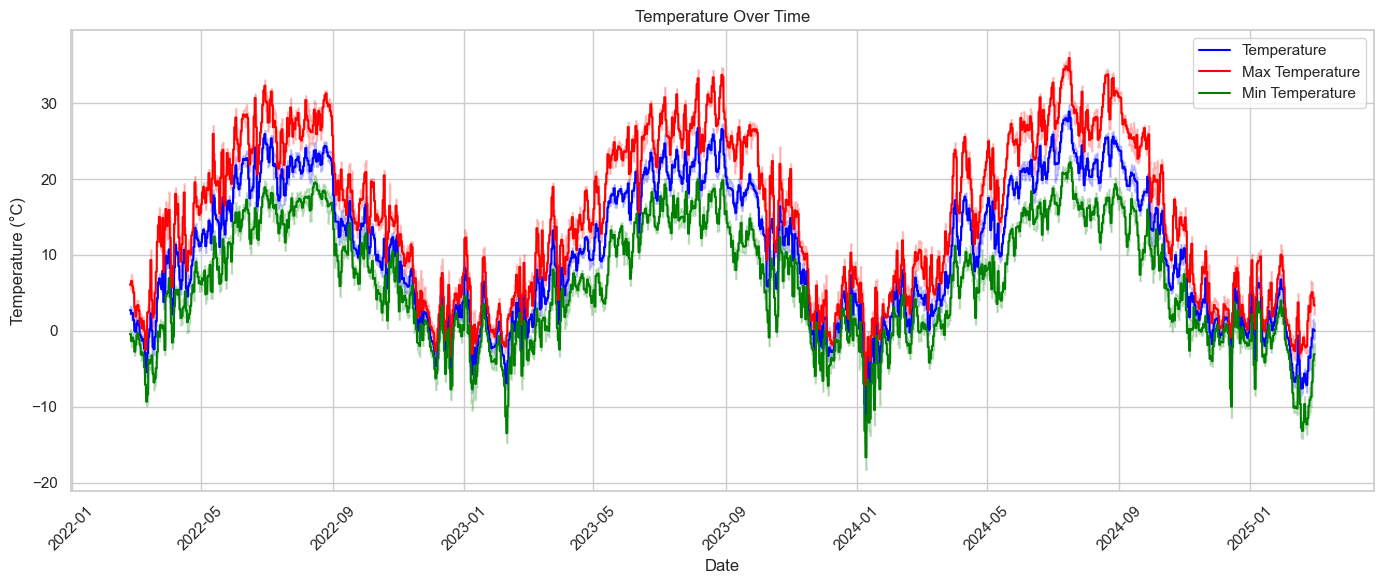

In [263]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.lineplot(data=weather, x='datetime', y='day_temp', label='Temperature', color='blue')
sns.lineplot(data=weather, x='datetime', y='day_tempmax', label='Max Temperature', color='red')
sns.lineplot(data=weather, x='datetime', y='day_tempmin', label='Min Temperature', color='green')

plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

Thіі visualization show the trend in humidity over time. The plot illustrates the daily humidity, including maximum and minimum values.

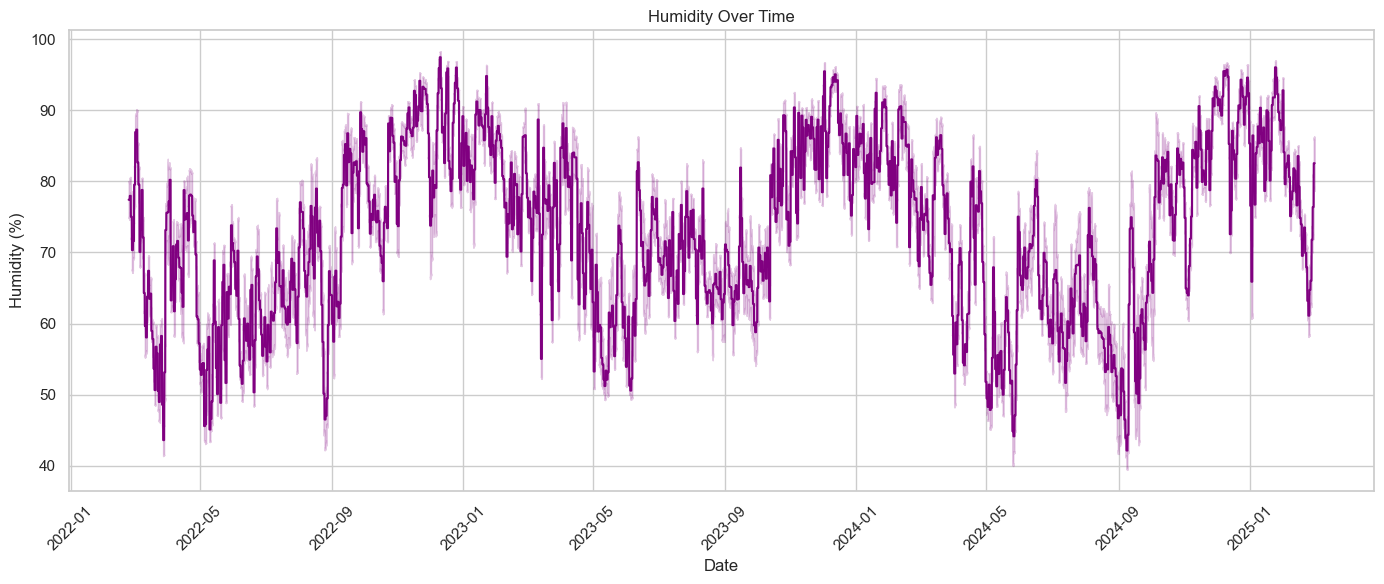

In [264]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.lineplot(data=weather, x='datetime', y='day_humidity', color='purple')

plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This histogram shows the distribution of temperatures over time, with a kernel density estimate (KDE) to illustrate the probability density.

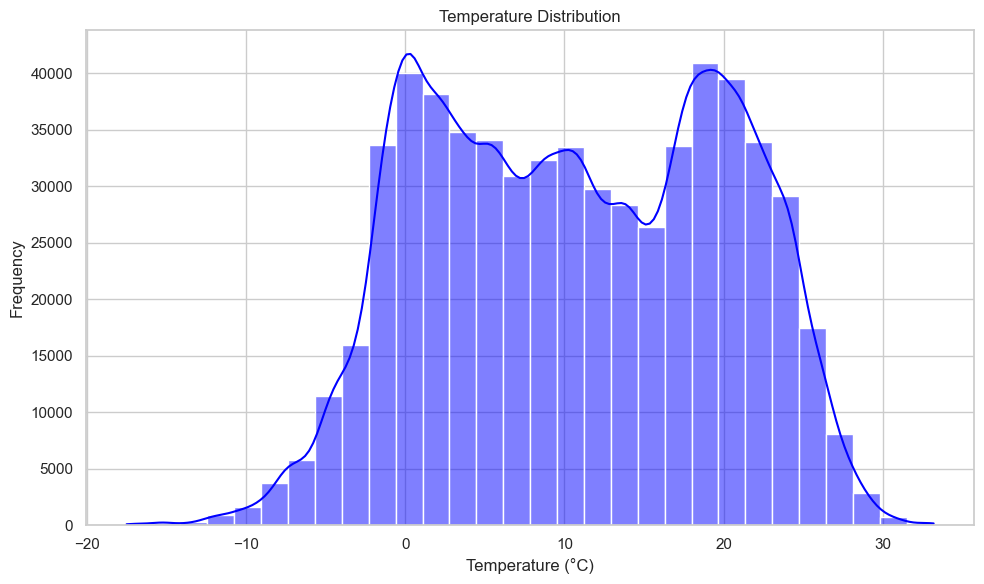

In [265]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

sns.histplot(weather['day_temp'], kde=True, color='blue', bins=30)

plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

This line plot compares the daily minimum and maximum temperatures over time.

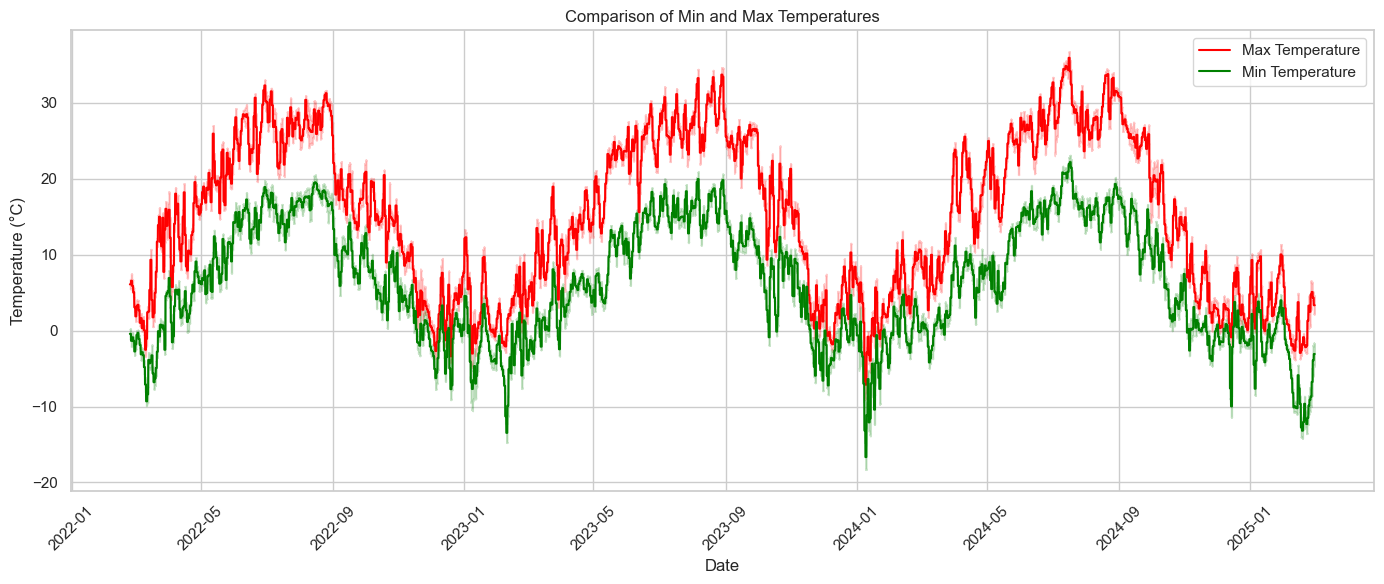

In [266]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.lineplot(data=weather, x='datetime', y='day_tempmax', label='Max Temperature', color='red')
sns.lineplot(data=weather, x='datetime', y='day_tempmin', label='Min Temperature', color='green')

plt.title('Comparison of Min and Max Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

This line plot shows the hourly temperature throughout the day, along with the daily maximum and minimum temperatures for comparison.

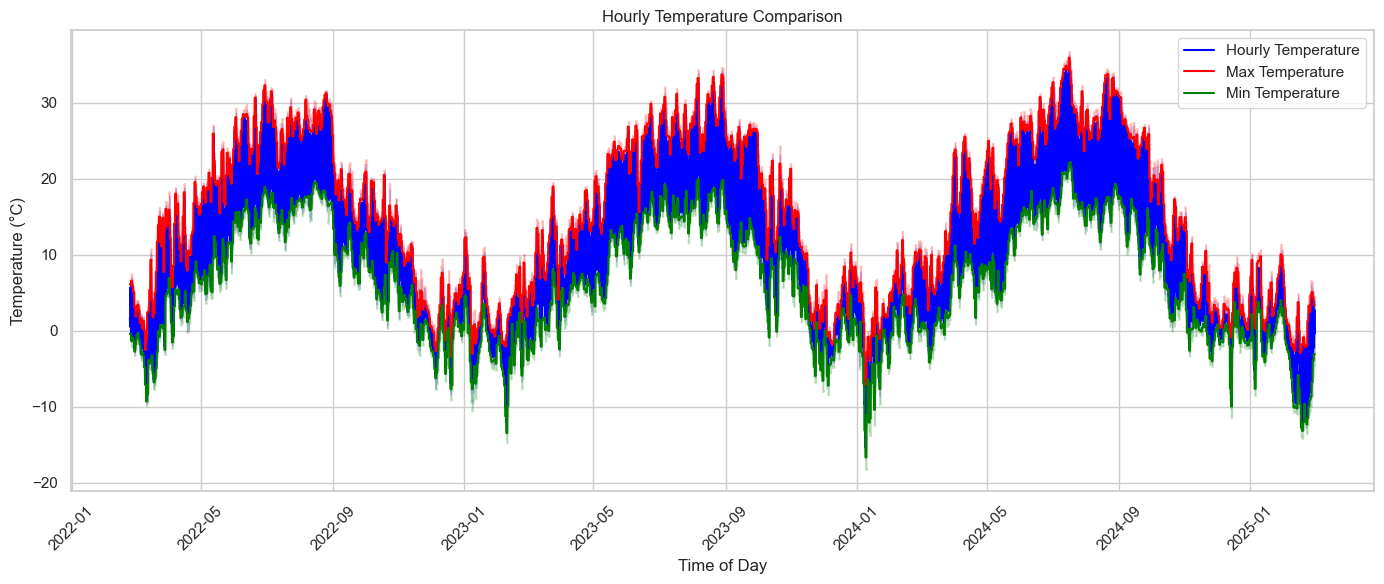

In [267]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

# Plotting the hourly temperature, max temperature, and min temperature
sns.lineplot(data=weather, x='datetime', y='hour_temp', label='Hourly Temperature', color='blue')
sns.lineplot(data=weather, x='datetime', y='day_tempmax', label='Max Temperature', color='red')
sns.lineplot(data=weather, x='datetime', y='day_tempmin', label='Min Temperature', color='green')

plt.title('Hourly Temperature Comparison')
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


This line plot shows the hourly humidity throughout the day, providing insights into how humidity changes over time.

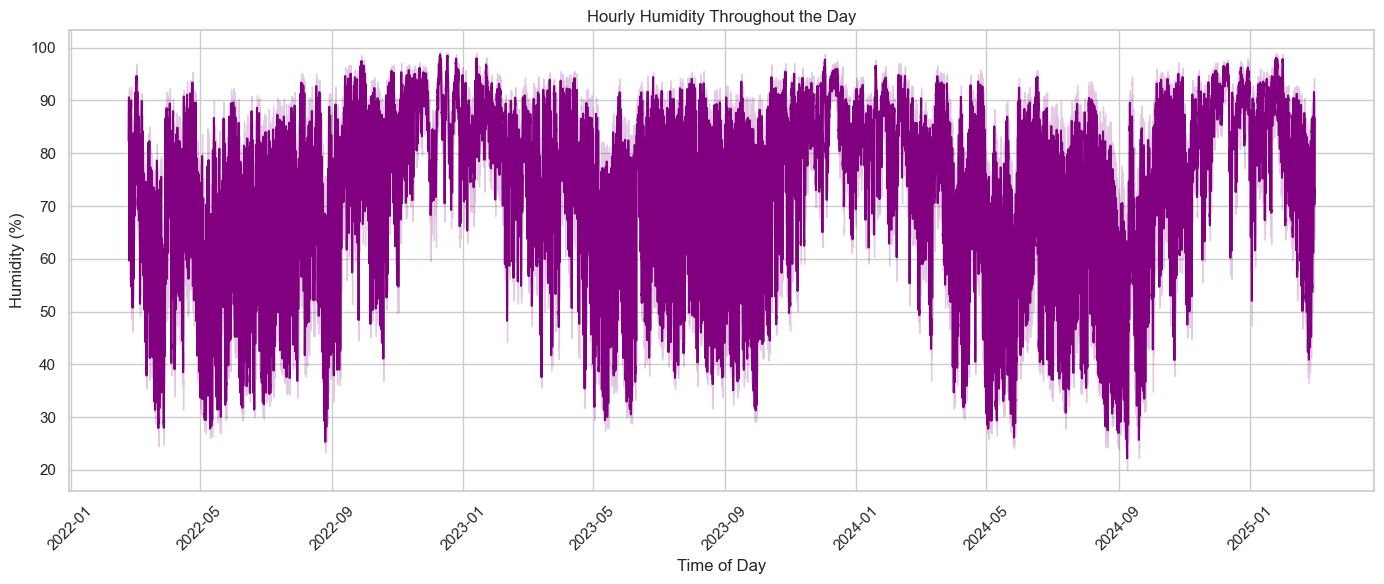

In [268]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.lineplot(data=weather, x='datetime', y='hour_humidity', color='purple')

plt.title('Hourly Humidity Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This scatter plot shows the relationship between temperature and humidity, allowing us to see how they are correlated throughout the day.

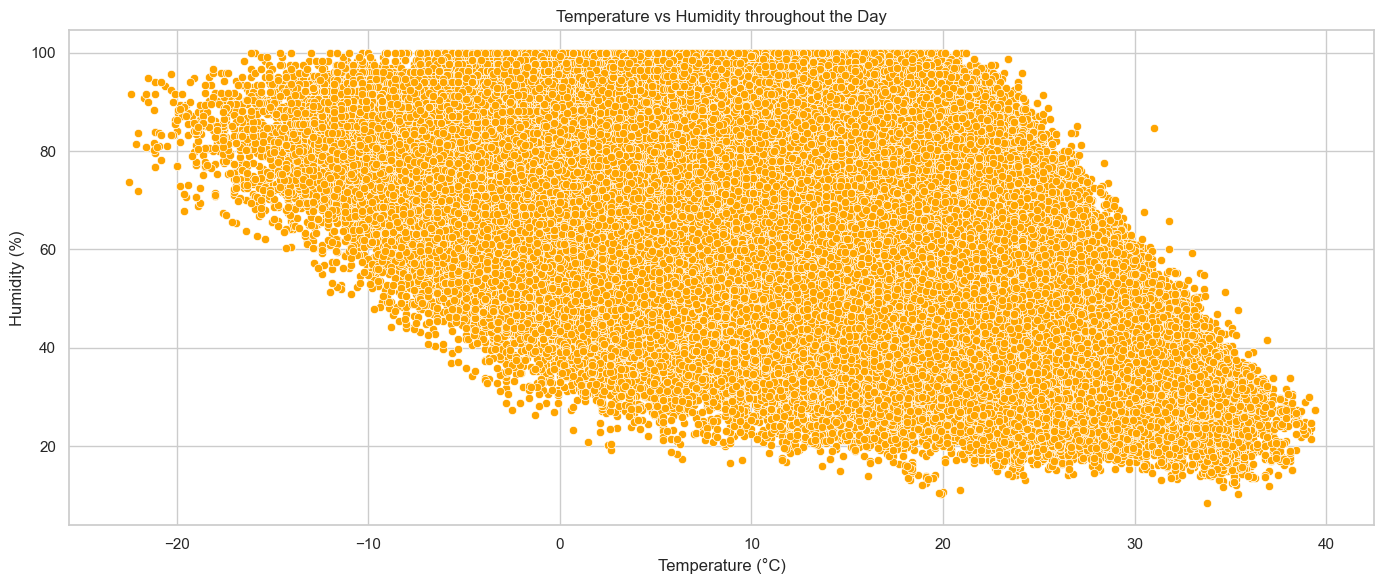

In [269]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.scatterplot(data=weather, x='hour_temp', y='hour_humidity', color='orange')

plt.title('Temperature vs Humidity throughout the Day')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

This plot contains three parameters:

1. *Max Temperature by Region*: This bar chart shows the average maximum temperature for each region.
2. *Wind Speed by Region*: This bar chart displays the average wind speed for each region.
3. *Humidity by Region*: This bar chart represents the average humidity for each region.

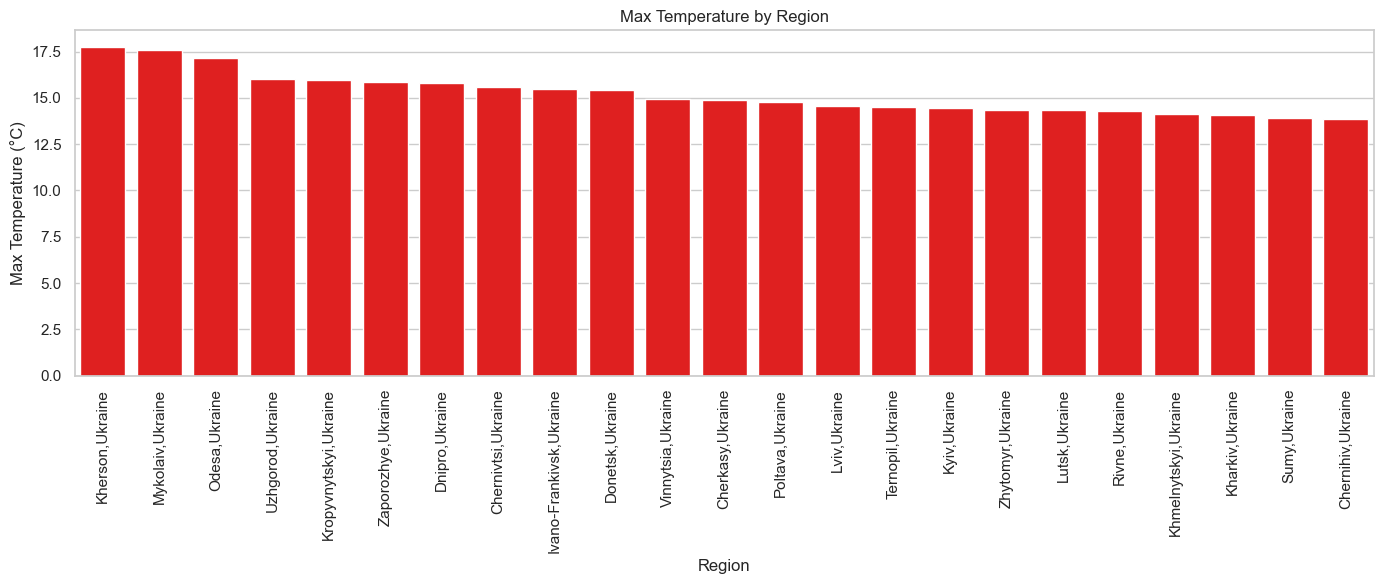

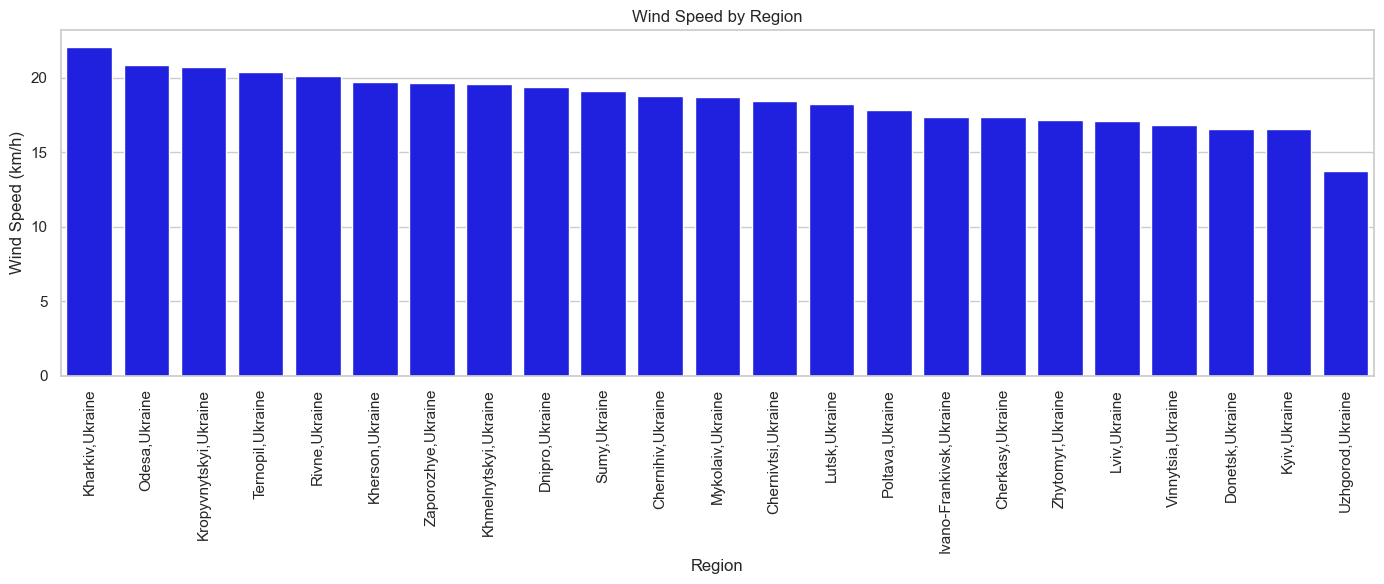

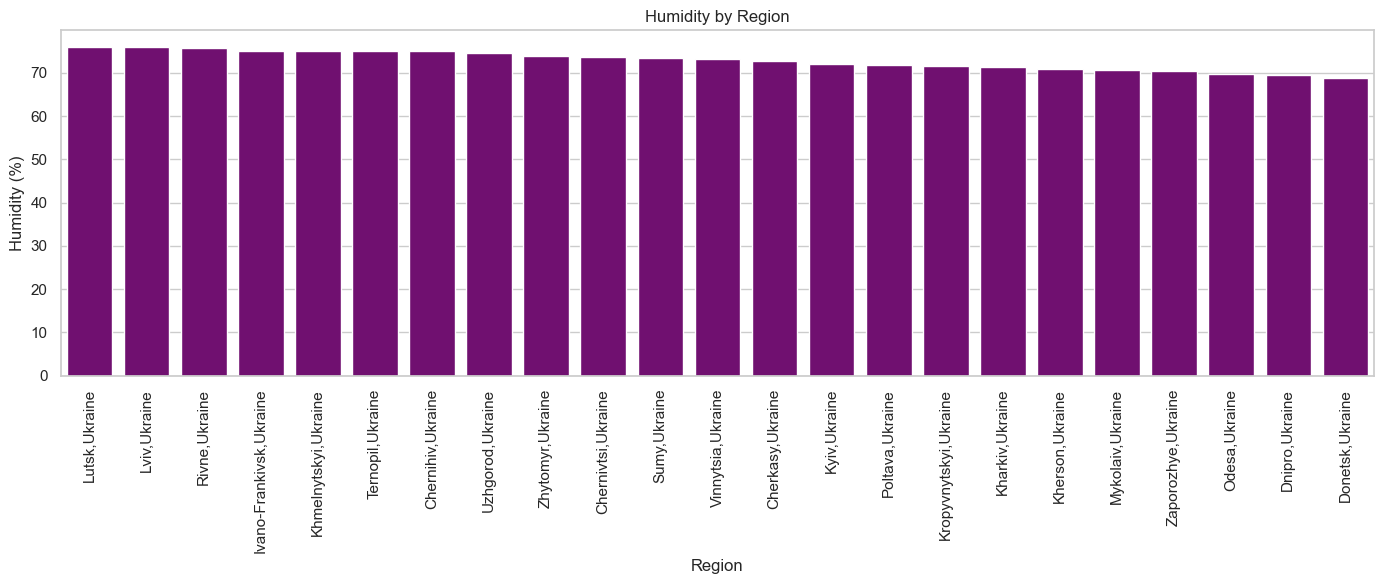

In [270]:
region_temp_max = weather.groupby('city_address')['day_tempmax'].mean().sort_values(ascending=False)
region_wind_speed = weather.groupby('city_address')['day_windspeed'].mean().sort_values(ascending=False)
region_humidity = weather.groupby('city_address')['day_humidity'].mean().sort_values(ascending=False)

# plot for max temperature
plt.figure(figsize=(14, 6))
sns.barplot(x=region_temp_max.index, y=region_temp_max.values, color='red')
plt.title('Max Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Max Temperature (°C)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# plot for wind speed
plt.figure(figsize=(14, 6))
sns.barplot(x=region_wind_speed.index, y=region_wind_speed.values, color='blue')
plt.title('Wind Speed by Region')
plt.xlabel('Region')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# plot for humidity
plt.figure(figsize=(14, 6))
sns.barplot(x=region_humidity.index, y=region_humidity.values, color='purple')
plt.title('Humidity by Region')
plt.xlabel('Region')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart shows the average precipitation (in millimeters) for each region, allowing comparison of how much precipitation different regions receive on average.

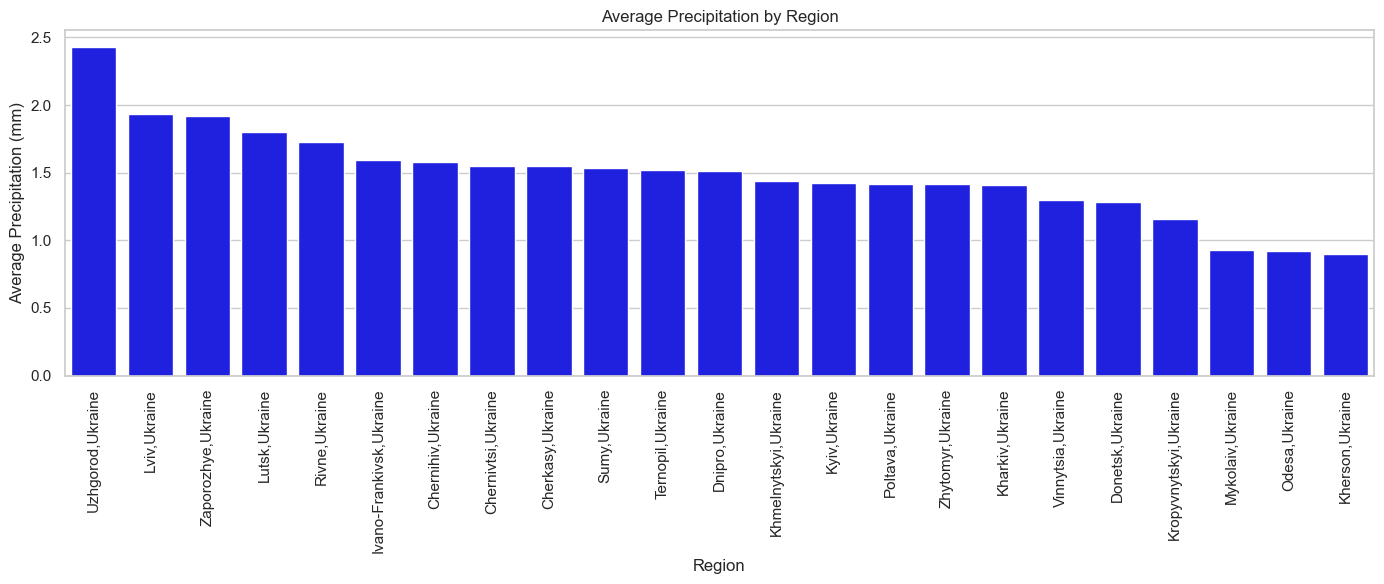

In [271]:
region_precip = weather.groupby('city_address')['day_precip'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=region_precip.index, y=region_precip.values, color='blue')
plt.title('Average Precipitation by Region')
plt.xlabel('Region')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This box plot shows the distribution of temperatures by region, displaying the median, quartiles, and any outliers (extreme values).

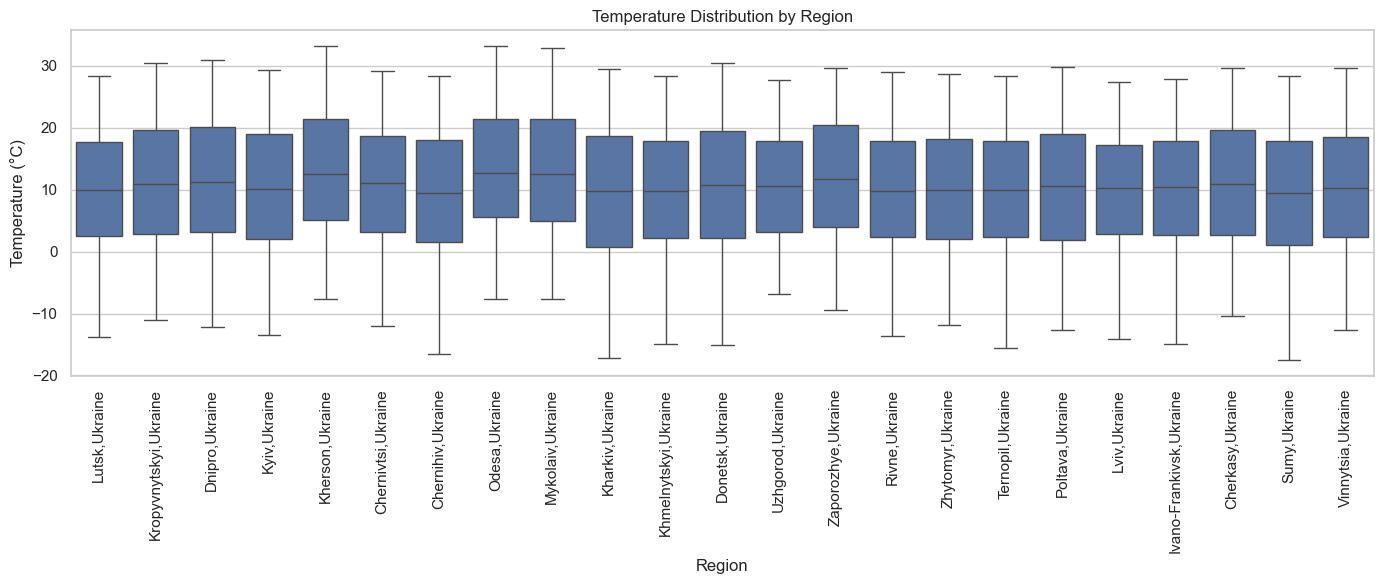

In [274]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

# Box plot для температури по регіонах
sns.boxplot(x='city_address', y='day_temp', data=weather)

plt.title('Temperature Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

This heatmap shows the correlation between different weather parameters. The color intensity indicates the strength of the correlation, with positive correlations shown in warmer colors (red) and negative correlations in cooler colors (blue). The values on the heatmap represent the correlation coefficient between the parameters.

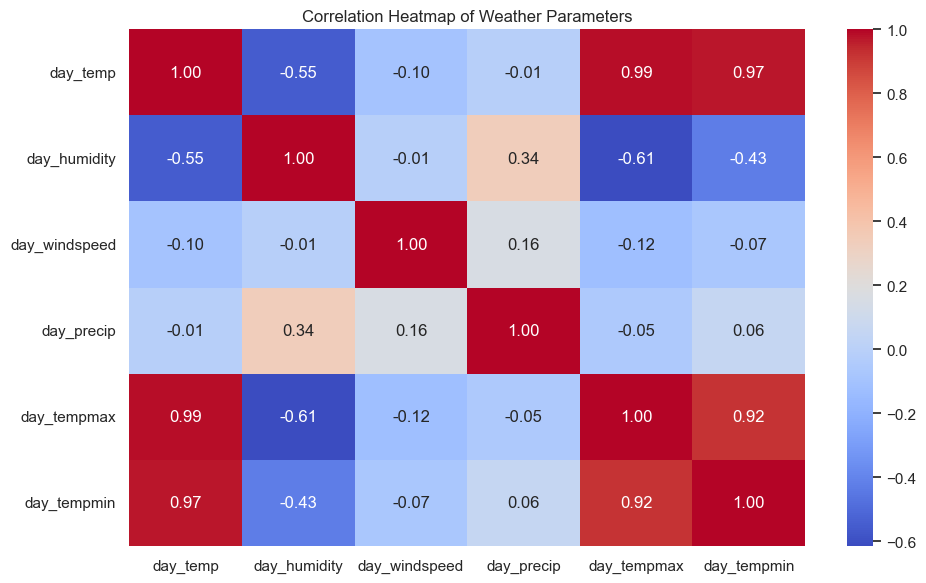

In [275]:
weather_corr = weather[['day_temp', 'day_humidity', 'day_windspeed', 'day_precip', 'day_tempmax', 'day_tempmin']]

corr_matrix = weather_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Heatmap of Weather Parameters')
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between temperature and wind speed, with each point representing a specific time period. It helps to visualize if there's any correlation or pattern between these two weather parameters.

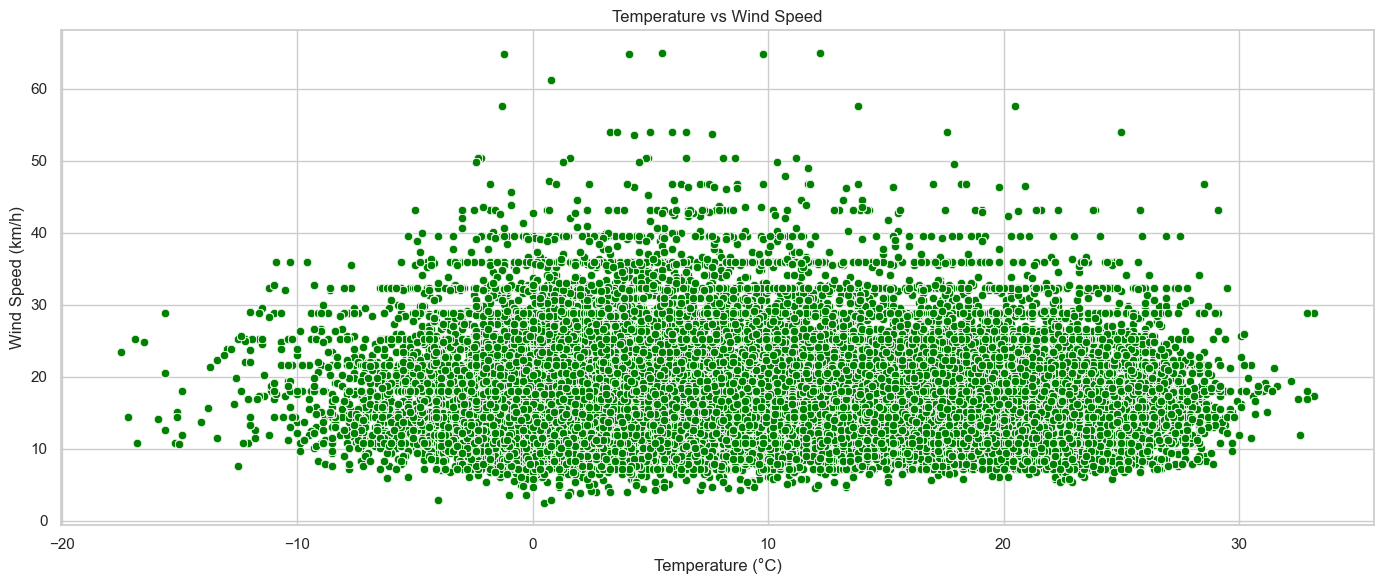

In [276]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.scatterplot(data=weather, x='day_temp', y='day_windspeed', color='green')

plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (km/h)')

plt.tight_layout()
plt.show()

This pair plot visualizes the relationships between multiple weather parameters. Each scatter plot shows the correlation between two variables, and the diagonal displays the distribution of each individual variable.

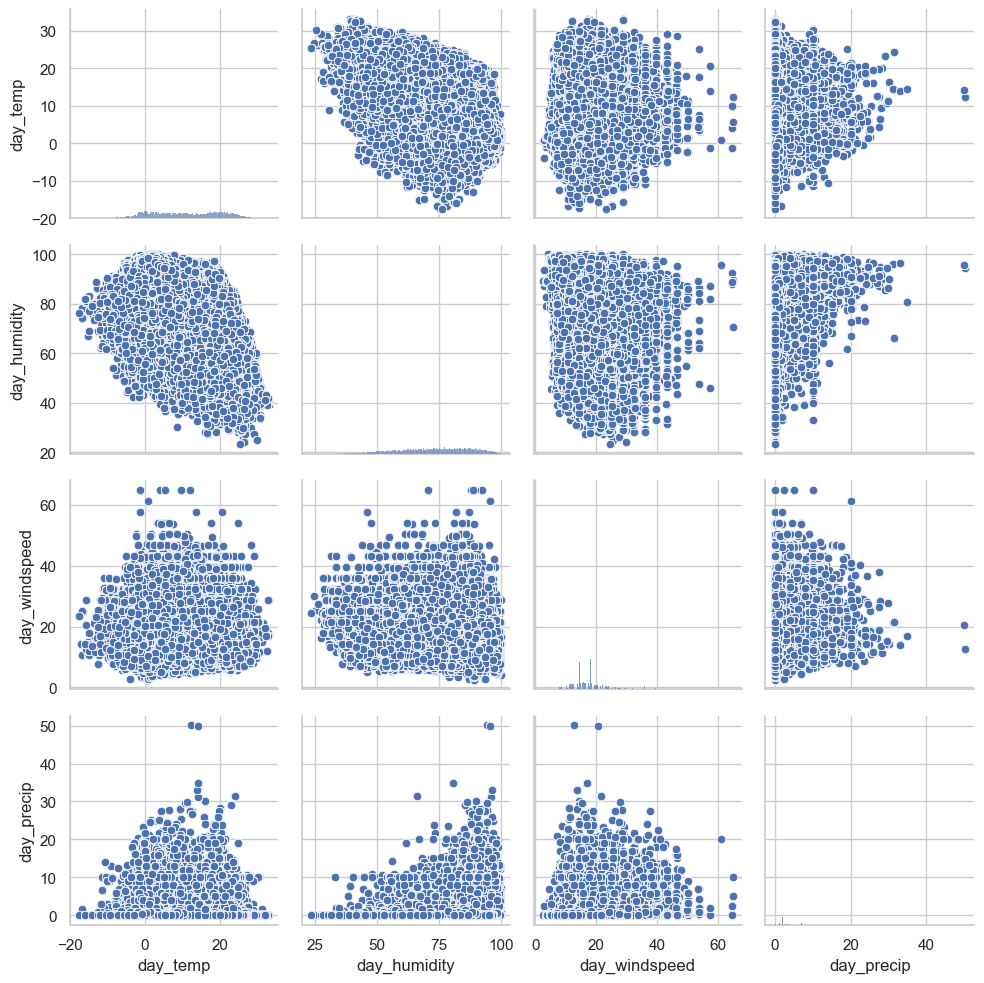

In [277]:
sns.set(style='whitegrid')

weather_subset = weather[['day_temp', 'day_humidity', 'day_windspeed', 'day_precip']]

sns.pairplot(weather_subset)

plt.tight_layout()
plt.show()

This line plot shows the temperature trend throughout the day, comparing the current temperature with the maximum and minimum temperatures. It helps to visualize the temperature fluctuations over time and identify the periods with the largest variations.

KeyboardInterrupt: 

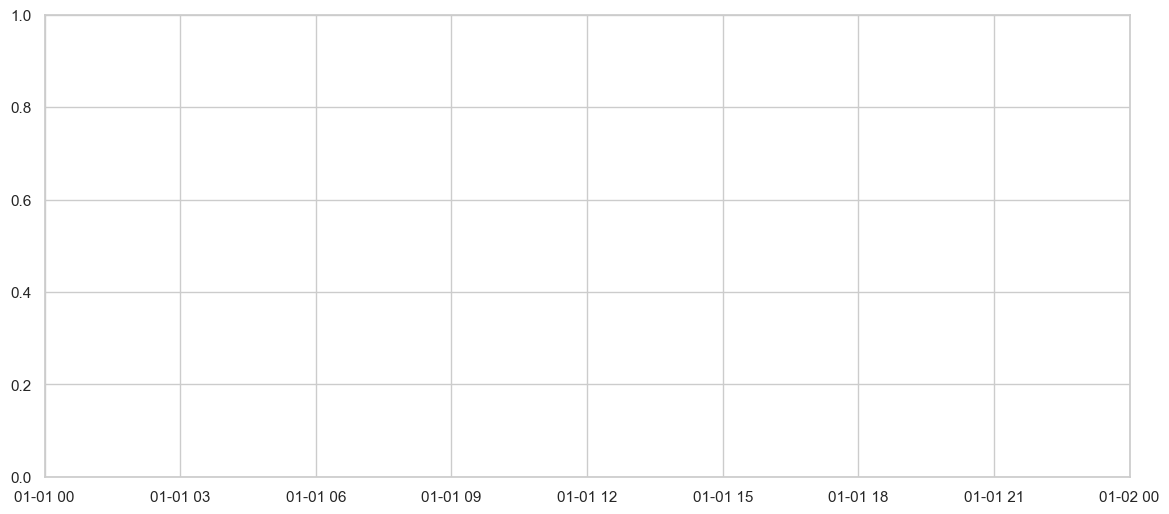

In [283]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

sns.lineplot(data=weather, x='datetime', y='hour_temp', label='Current Temperature', color='blue')
sns.lineplot(data=weather, x='datetime', y='day_tempmax', label='Max Temperature', color='red')
sns.lineplot(data=weather, x='datetime', y='day_tempmin', label='Min Temperature', color='green')

plt.title('Temperature Trend Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')

plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

This bar chart compares the average wind speed in each region, helping to identify where the strongest winds are.

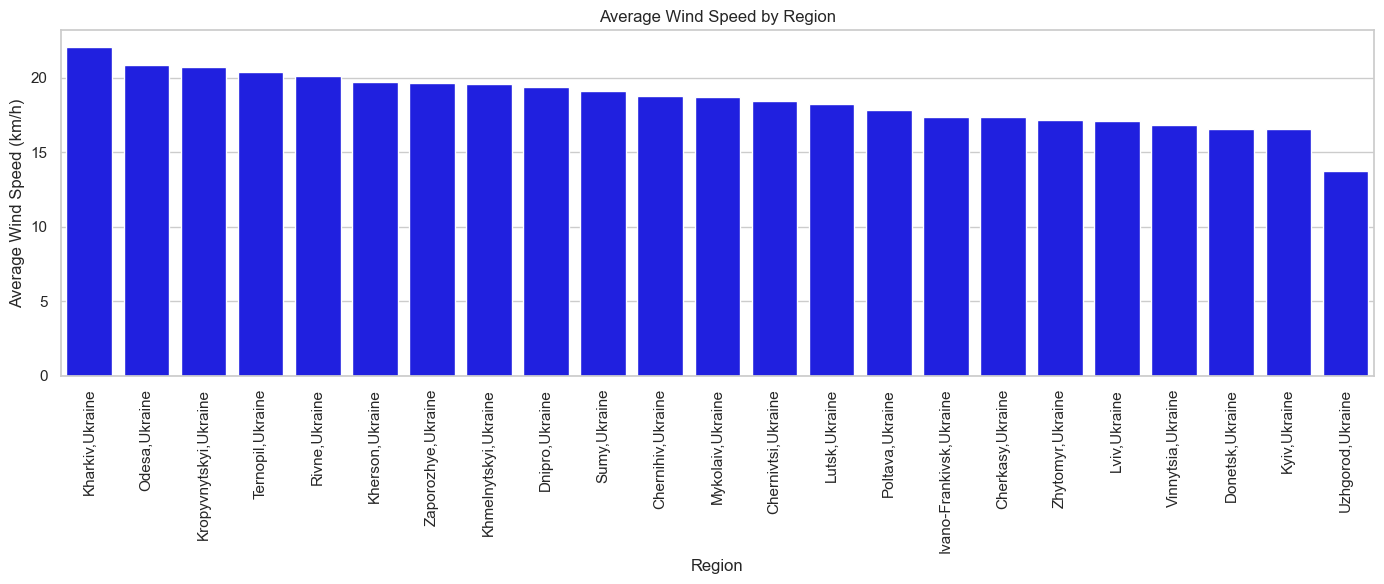

In [284]:
region_avg_wind_speed = weather.groupby('city_address')['day_windspeed'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=region_avg_wind_speed.index, y=region_avg_wind_speed.values, color='blue')

# Додаємо заголовок та підписи до осей
plt.title('Average Wind Speed by Region')
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (km/h)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()